# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated regularly, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interact with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of the profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about the program through email, Representative shared information with a lead like a brochure of program, etc 
    * Phone Activity: Had a Phone Conversation with a representative, Had conversation over SMS with a representative, etc
    * Website Activity: Interacted on live chat with a representative, Updated profile on the website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

### **Please read the instructions carefully before starting the project.** 
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. 
* Blanks '_______' are provided in the notebook that 
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space. 
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

In [47]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Import Dataset

In [48]:
learn = pd.read_csv(
    r"C:\Users\subde\OneDrive - Universidad La Salle Chihuahua\Cursos\MIT\Data Science & Machine Learning\Curso\6. Classification and Hypothesis Testing\2. Proyecto\2. Proyecto Classification and Hypothesis\ExtraaLearn.csv"
)  ##  Complete the code to read the data

<IPython.core.display.Javascript object>

In [49]:
# copying data to another variable to avoid any changes to original data
data = learn.copy()

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset

In [50]:
data.head()  ##  Complete the code to view top 5 rows of the data

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


<IPython.core.display.Javascript object>

In [51]:
data.tail()  ##  Complete the code to view last 5 rows of the data

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


<IPython.core.display.Javascript object>

### Understand the shape of the dataset

In [52]:
data.shape  ## Complete the code to get the shape of data

(4612, 15)

<IPython.core.display.Javascript object>

### Check the data types of the columns for the dataset

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

<IPython.core.display.Javascript object>

In [54]:
# checking for duplicate values
data.duplicated()  ## Complete the code to check duplicate entries in the data

0       False
1       False
2       False
3       False
4       False
        ...  
4607    False
4608    False
4609    False
4610    False
4611    False
Length: 4612, dtype: bool

<IPython.core.display.Javascript object>

## Exploratory Data Analysis

**Let's check the statistical summary of the data.**

In [55]:
data.describe().T  ##  Complete the code to print the statistical summary of the data

,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
status,4612.00000,0.29857,0.45768,0.00000,0.00000,0.00000,1.00000,1.00000


<IPython.core.display.Javascript object>

In [56]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: ID, Length: 4612, dtype: int64
--------------------------------------------------
Professional    2616
Unemployed      1441
Student          555
Name: current_occupation, dtype: int64
--------------------------------------------------
Website       2542
Mobile App    2070
Name: first_interaction, dtype: int64
--------------------------------------------------
High      2264
Medium    2241
Low        107
Name: profile_completed, dtype: int64
--------------------------------------------------
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: last_activity, dtype: int64
--------------------------------------------------
No     4115
Yes     497
Name: print_media_type1, dtype: int64
--------------------------------------------------
No     4379
Yes     233
Name: print_media_type2, dtype: int64
--------------------

<IPython.core.display.Javascript object>

In [57]:
# checking the number of unique values
data["ID"].nunique()  # Complete the code to check the number of unique values

4612

<IPython.core.display.Javascript object>

In [58]:
data.drop(
    ["ID"], axis=1, inplace=True
)  # Complete the code to drop "ID" column from data

<IPython.core.display.Javascript object>

### Univariate Analysis

In [59]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Observations on age

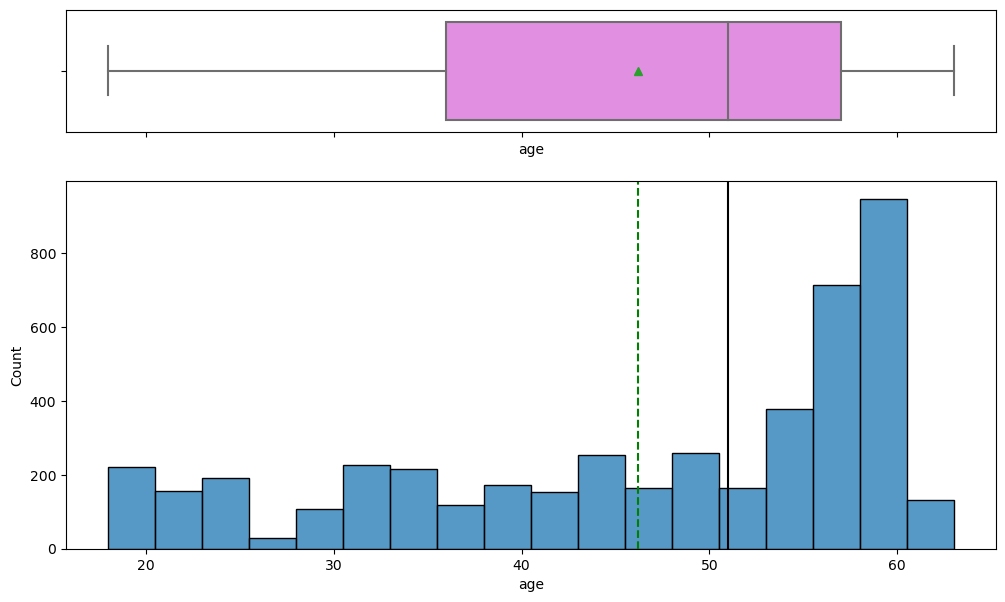

<IPython.core.display.Javascript object>

In [60]:
histogram_boxplot(data, "age")

The histogram and boxplot of the "age" variable provide valuable insights into the distribution and central tendency of the age data.

The histogram represents the frequency distribution of ages, with the x-axis representing age ranges and the y-axis representing the count of individuals in each range. The shape of the histogram can provide information about the age distribution of the population. For example, if the histogram is skewed to the right, it indicates that there are more younger individuals in the dataset. Conversely, if it is skewed to the left, it suggests a higher number of older individuals.

The boxplot, displayed above the histogram, provides additional information about the central tendency and spread of the age data. The box in the plot represents the interquartile range (IQR), with the line inside the box indicating the median age. The whiskers extend from the box to show the range of ages, excluding any outliers. Outliers are depicted as individual points beyond the whiskers.

By examining the boxplot, we can observe the following:

* The median age, represented by the black line, indicates the central value around which the age data is distributed.
* The box length indicates the spread of ages within the middle 50% of the data.
* The whiskers depict the range of ages, excluding any outliers.

Overall, the histogram and boxplot of the "age" variable provide a comprehensive view of the age distribution, central tendency, spread, and outliers within the dataset. 

### Observations on website_visits

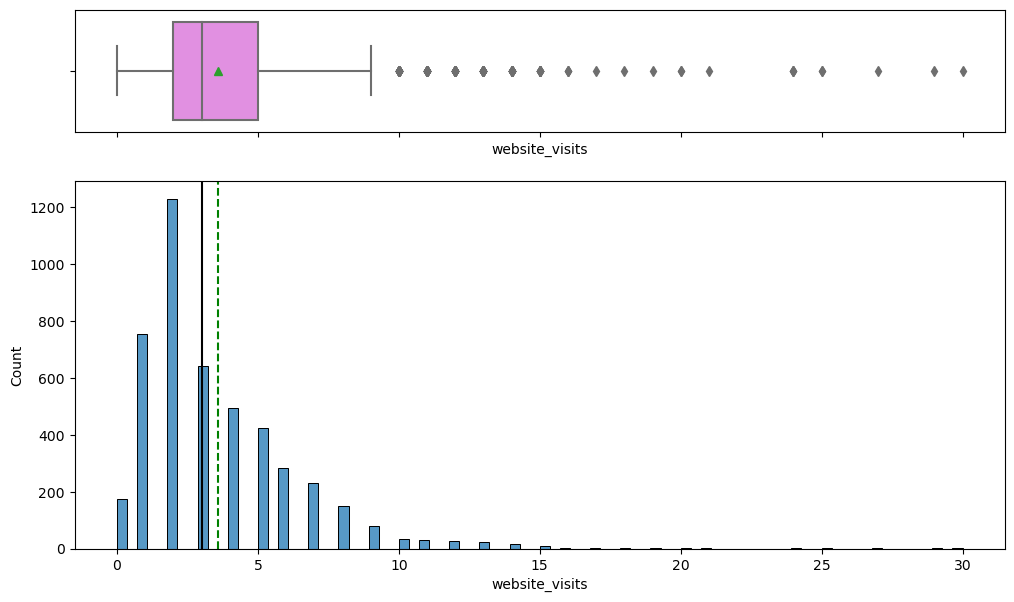

<IPython.core.display.Javascript object>

In [61]:
histogram_boxplot(data,'website_visits') # Complete the code to plot a histogram_boxplot for website_visits


The histogram and boxplot provide insights into the distribution and summary statistics of the "website_visit" variable.

The histogram shows the frequency distribution of website visits, indicating the number of individuals in each range of visits. 
From the histogram, we can observe that the majority of individuals have a relatively low number of website visits, as the frequency decreases as the number of visits increases. This suggests that a significant portion of users may have low engagement with the website.

The boxplot provides additional summary statistics, including the median, interquartile range, and any potential outliers. 
By examining the boxplot, we can see the central tendency of the data, represented by the median line. The box represents the interquartile range, which contains the middle 50% of the data. 
Additionally, any data points that fall outside the whiskers of the boxplot are considered potential outliers.

Overall, based on the histogram and boxplot analysis, it appears that the distribution of website visits is positively skewed, with a concentration of users having a low number of visits. 

This information can be valuable since it could lead to understand the user engagement patterns and make data-driven decisions regarding website optimization, marketing strategies, or customer engagement initiatives.

In [62]:
# To check how many leads have not visited web-site
data[data["website_visits"] == 0].shape

(174, 14)

<IPython.core.display.Javascript object>

There are 174 instances in the dataset where the value of the "website_visits" variable is 0. 

This means that there are 174 individuals who have not visited the website at all.

This finding is important as it indicates a segment of users who have not engaged with the website.

It suggests that there might be factors affecting user engagement or barriers preventing these individuals from visiting the website. It would be beneficial for the organization to investigate and understand the reasons behind this lack of website visits.

### Observations on number of time_spent_on_website

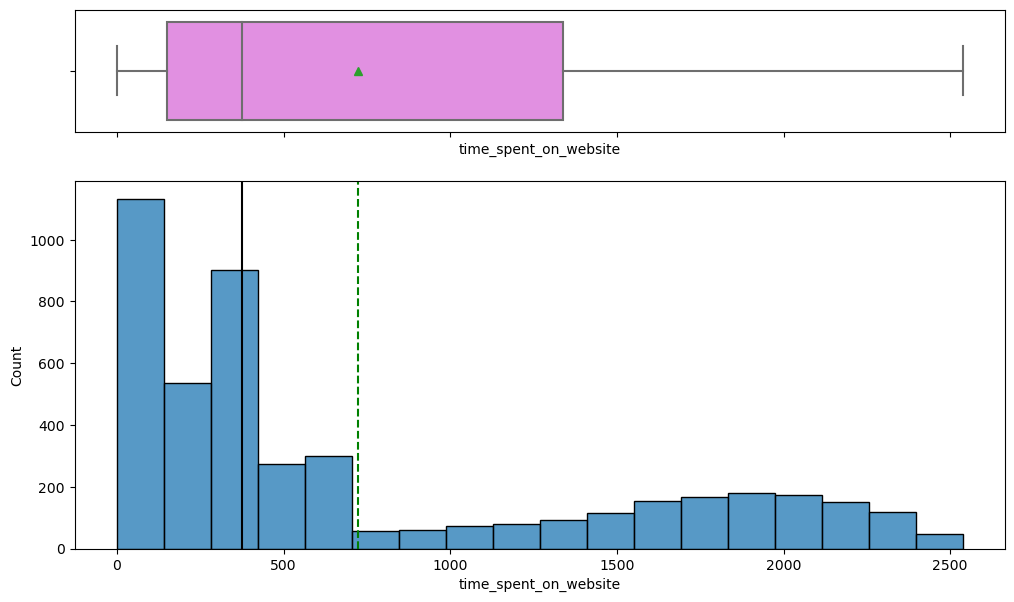

<IPython.core.display.Javascript object>

In [63]:
histogram_boxplot(data, 'time_spent_on_website') # Complete the code to plot a histogram_boxplot for time_spent_on_website


The histogram and boxplot provide insights into the distribution and characteristics of the "time_spent_on_website" variable in the dataset.

The histogram represents the frequency distribution of the time spent on the website. The x-axis represents the time spent, and the y-axis represents the count or frequency of individuals. The shape of the histogram provides information about the distribution pattern of the data. For example, if the histogram is skewed to the right, it indicates that a larger number of individuals have spent less time on the website, while a smaller number have spent more time.

The boxplot provides additional statistical information. The box represents the interquartile range (IQR), which contains the middle 50% of the data. The line inside the box represents the median, which is the middle value when the data is sorted. The whiskers extend from the box and indicate the range of the data, excluding any outliers.

By analyzing the histogram and boxplot of the "time_spent_on_website" variable, the directors can gain insights into the engagement levels of website visitors. They can observe the distribution of time spent on the website and identify any potential outliers or patterns. This information can help in understanding the typical behavior of users and identifying opportunities to improve website engagement.

For example, if the majority of users are spending a short amount of time on the website and there are few outliers indicating longer durations, it may suggest that the website needs enhancements to increase user engagement and encourage them to spend more time. On the other hand, if the majority of users are already spending a significant amount of time on the website, the focus may shift towards optimizing the user experience and maximizing the value derived from these visits.

Overall, this can utilize the insights from the histogram and boxplot of the "time_spent_on_website" variable to make data-driven decisions and devise strategies to improve user engagement, enhance website performance, and drive business growth.

### Observations on number of page_views_per_visit

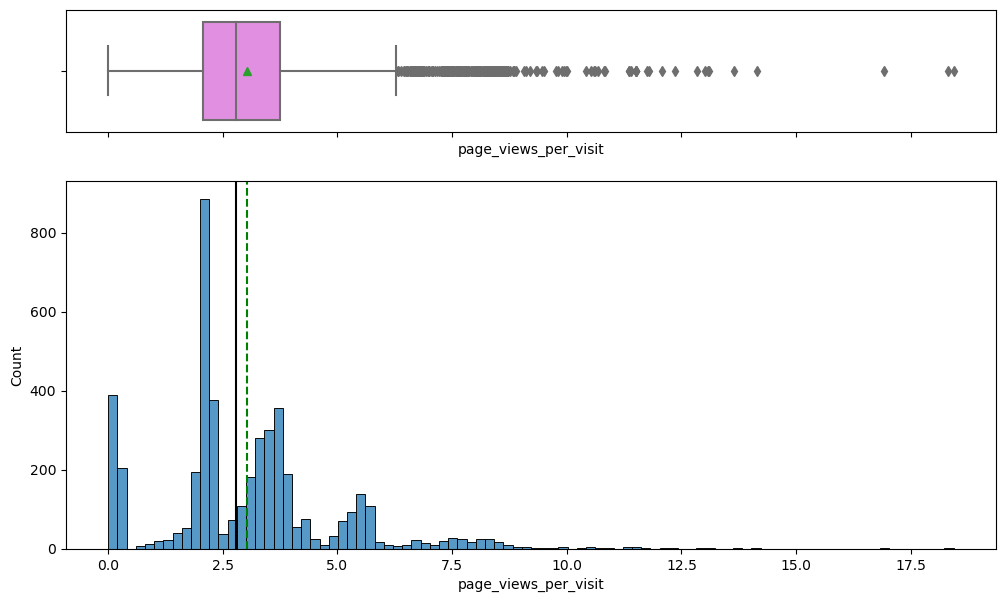

<IPython.core.display.Javascript object>

In [64]:
histogram_boxplot(data,"page_views_per_visit") # Complete the code to plot a histogram_boxplot for page_views_per_visit


The histogram and boxplot provide insights into the distribution and characteristics of the "page_views_per_visit" variable in the dataset.

The histogram represents the frequency distribution of the number of page views per visit. The x-axis represents the number of page views, and the y-axis represents the count or frequency of individuals. The shape of the histogram provides information about the distribution pattern of the data. For example, if the histogram is skewed to the right, it indicates that a larger number of individuals have fewer page views per visit, while a smaller number have more page views.

The boxplot provides additional statistical information. The box represents the interquartile range (IQR), which contains the middle 50% of the data. The line inside the box represents the median, which is the middle value when the data is sorted. The whiskers extend from the box and indicate the range of the data, excluding any outliers.

By analyzing the histogram and boxplot of the "page_views_per_visit" variable, we can observe the distribution of page views and identify any potential outliers or patterns. This information can provide valuable insights into user engagement and website navigation.

The directors can use these insights to evaluate the effectiveness of the website in terms of engaging visitors and encouraging them to explore multiple pages. If the histogram shows that the majority of visitors have a low number of page views per visit, it may indicate a need for improvements in website design, content organization, or calls to action to encourage users to navigate through more pages. Conversely, if the majority of visitors have a high number of page views per visit, it suggests that the website is successful in captivating users and encouraging them to explore further.

Overall, the CFO and CEO can leverage the findings from the histogram and boxplot of the "page_views_per_visit" variable to gain insights into user engagement levels, assess the effectiveness of their website's navigation and content, and make data-driven decisions to optimize the website's performance and enhance the overall user experience.

In [65]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Observations on current_occupation

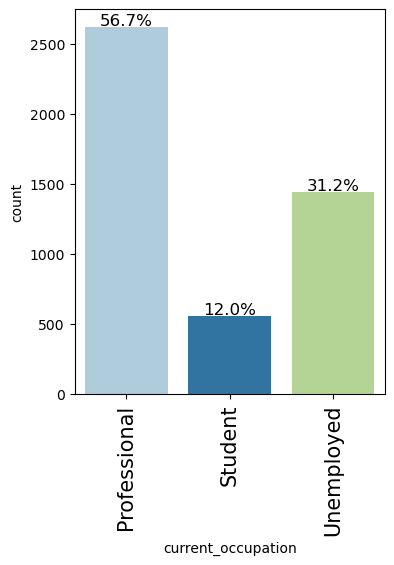

<IPython.core.display.Javascript object>

In [66]:
labeled_barplot(data, "current_occupation", perc=True)

Based on the bar plot generated by the code, we can observe that the majority of leads in the dataset have a current occupation of "Professional", followed by "Unemployed" and "Student". 

This information can be valuable for ExtraaLearn in understanding the profile of their potential customers. 

It indicates that professionals show a higher interest in their programs compared to unemployed individuals and students. 

This insight can help the CFO and CEO make informed decisions about resource allocation and targeting specific occupations for lead conversion strategies.

### Observations on number of first_interaction

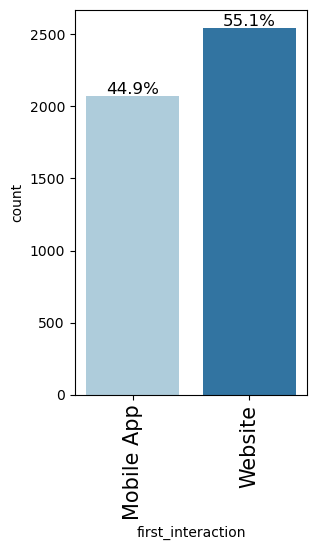

<IPython.core.display.Javascript object>

In [67]:
labeled_barplot(
    data, "first_interaction", perc=True
)  # Complete the code to plot labeled_barplot for first_interaction

Based on the bar plot generated by the code, we can conclude that the majority of leads had their first interaction with ExtraaLearn through the website, followed by the mobile app.

This indicates that the website is the primary channel through which leads initially engage with ExtraaLearn's offerings. 

It suggests that the website is effective in attracting and capturing the attention of potential customers. This information can be useful for the Marketing and IT department in understanding the preferred channels of interaction for leads, allowing them to allocate resources and prioritize website-related initiatives to further enhance user experience and lead conversion on the website.

### Observations on profile_completed

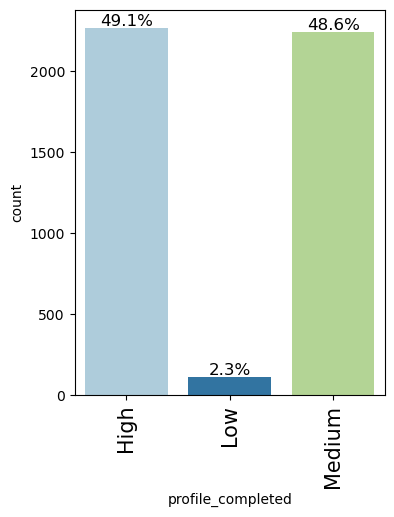

<IPython.core.display.Javascript object>

In [68]:
labeled_barplot(
    data, "profile_completed", perc=True
)  # Complete the code to plot labeled_barplot for profile_completed

Based on the bar plot generated by the code, we can observe that the majority of leads have a high completion percentage of their profile on the ExtraaLearn website or mobile app, accounting for approximately 49.1% of the total leads. The second highest category is medium completion, representing around 48.6% of the leads. On the other hand, the low completion category has the lowest percentage, with only 2.3% of the leads falling into this group.

This indicates that a significant portion of the leads have shown a strong level of engagement and interest by completing a high percentage of their profile. It suggests that these leads are more likely to be serious about exploring and potentially converting to paid customers. The relatively low percentage in the low completion category implies that the majority of leads are actively providing information and engaging with the platform, which is a positive sign for lead conversion.

For the Marketing and IT deparment, this insight highlights the importance of encouraging and facilitating profile completion among leads. It indicates that efforts should be made to provide a seamless and user-friendly profile completion process to enhance the likelihood of lead conversion. Additionally, allocating resources to engage and nurture leads in the medium completion category may also be beneficial, as they represent a significant portion of the overall leads and have the potential to move towards higher completion percentages and eventual conversion.


### Observations on last_activity

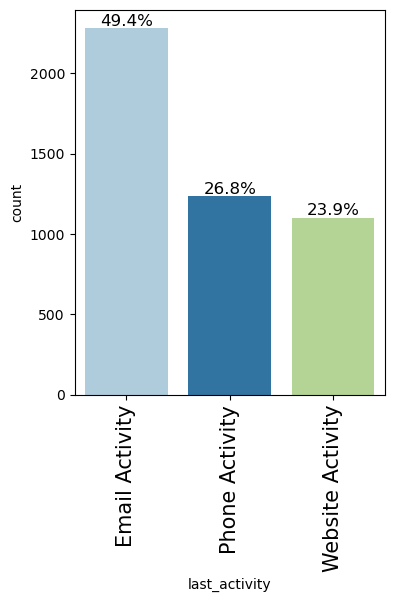

<IPython.core.display.Javascript object>

In [69]:
labeled_barplot(
    data, "last_activity", perc=True
)  # Complete the code to plot labeled_barplot for last_activity

Based on the bar plot generated by the code, we can conclude that the majority of the last activities of the leads are related to email interactions, accounting for approximately 49.4% of the total activities. The second highest category is phone activity, representing around 26.8% of the activities. Lastly, website activity has the lowest percentage, with only 23.9% of the activities.

This indicates that a significant portion of the leads prefer to engage with ExtraaLearn through email interactions. It suggests that email communication plays a crucial role in the lead conversion process, as it allows for detailed information sharing and personalized communication. The relatively high percentage in the phone activity category implies that phone conversations are also an important channel for lead engagement. Phone interactions may provide a more direct and immediate connection with the leads, enabling effective communication and addressing any concerns or queries they may have. The lower percentage in the website activity category suggests that direct interactions on the website, such as live chat or profile updates, are less prevalent among the leads.

For the marketing team, this insight highlights the significance of having a robust email marketing strategy and effective phone communication channels. It emphasizes the need to prioritize email interactions and ensure that the email campaigns are well-crafted, personalized, and provide valuable information to the leads. Additionally, investing in resources and training for phone interactions can enhance the effectiveness of lead engagement. While website activity may have a relatively lower percentage, it is still essential to provide a seamless and user-friendly website experience to facilitate lead conversion and support other marketing efforts.

### Observations on print_media_type1

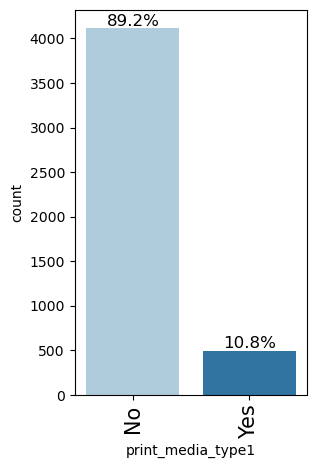

<IPython.core.display.Javascript object>

In [70]:
labeled_barplot(
    data, "print_media_type1", perc=True
)  # Complete the code to plot labeled_barplot for print_media_type1

We can conclude that the majority of leads, approximately 89.2%, have not seen the ad of ExtraaLearn in the newspaper (print media type 1). On the other hand, a relatively smaller percentage of leads, around 10.8%, have seen the ad in the newspaper.

This suggests that print media, specifically newspapers, may not be a highly effective channel for reaching and attracting leads in the context of ExtraaLearn. The majority of leads seem to be obtaining information about ExtraaLearn through other sources or channels. Therefore, it may be more beneficial for ExtraaLearn to focus its marketing efforts and allocate resources to channels that have a higher impact and reach a larger portion of the target audience.

For the marketing team, this insight highlights the need to evaluate the effectiveness of print media advertising, particularly in newspapers, in terms of lead generation and conversion. It suggests the potential for reallocating advertising budgets and exploring alternative channels that have shown more promising results in attracting leads. This could include leveraging digital marketing platforms, educational channels, referrals, or other online platforms where the target audience is more likely to engage and respond positively.

By optimizing the marketing strategy and directing resources towards channels with higher lead conversion potential, ExtraaLearn can enhance its marketing ROI and improve the overall efficiency of its lead generation efforts.

### Observations on print_media_type2

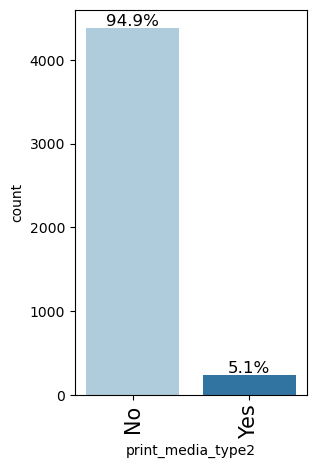

<IPython.core.display.Javascript object>

In [71]:
labeled_barplot(
    data, "print_media_type2", perc=True
)  # Complete the code to plot labeled_barplot for print_media_type2

Based on the bar plot generated by the code, we can conclude that the majority of leads, approximately 94.9%, have not seen the ad of ExtraaLearn in magazines (print media type 2). Only a small percentage of leads, around 5.1%, have seen the ad in magazines.

This suggests that advertising in magazines may not be an effective channel for reaching and engaging leads in the context of ExtraaLearn. The majority of leads are obtaining information about ExtraaLearn through other means or channels, indicating that magazine ads may not be capturing their attention or generating significant interest.

For the CFO, CEO and CMO, this insight highlights the need to evaluate the return on investment (ROI) for advertising in magazines. It suggests that the budget allocated to magazine ads may not be yielding the desired results in terms of lead generation and conversion. Therefore, it may be beneficial to reconsider the allocation of advertising resources and explore alternative channels that have shown higher effectiveness in reaching and engaging the target audience.

By optimizing the advertising strategy and focusing on channels with higher potential for lead conversion, ExtraaLearn can improve its marketing outcomes and make more efficient use of its advertising budget. This could involve reallocating resources to digital media platforms, educational channels, or other channels that have proven to be more effective in attracting leads and driving conversions.

### Observations on digital_media

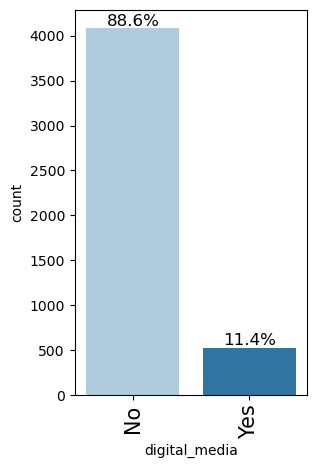

<IPython.core.display.Javascript object>

In [72]:
labeled_barplot(
    data, "digital_media", perc=True
)  # Complete the code to plot labeled_barplot for digital_media

We can conclude that the majority of leads, approximately 88.6%, have not seen the ad of ExtraaLearn on digital platforms. Only a small percentage of leads, around 11.4%, have seen the ad on digital platforms.

This suggests that digital media may not be the primary source of awareness and engagement for leads in the context of ExtraaLearn. Other marketing channels or strategies might be more effective in reaching and attracting leads.

### Observations on educational_channels

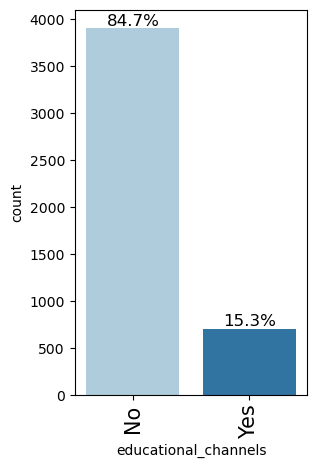

<IPython.core.display.Javascript object>

In [73]:
labeled_barplot(
    data, "educational_channels", perc=True
)  # Complete the code to plot labeled_barplot for educational_channels

Based on this bar plot, we can conclude that the majority of leads, approximately 84.7%, have not heard about ExtraaLearn through educational channels such as online forums, discussion threads, or educational websites. Only a small percentage of leads, around 15.3%, have been exposed to ExtraaLearn through educational channels.

This suggests that educational channels may not be the primary source of awareness for leads in the context of ExtraaLearn. Other marketing strategies or channels might be more effective in reaching and engaging the target audience.

For the CMO and the Marketing team, this insight highlights the importance of diversifying marketing efforts beyond educational channels. Exploring different avenues for lead generation and brand exposure could help in expanding the reach and attracting a wider audience to ExtraaLearn's offerings.

### Observations on referral

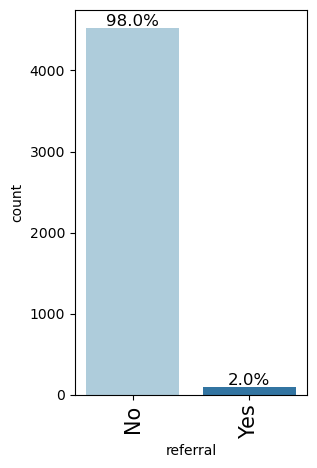

<IPython.core.display.Javascript object>

In [74]:
labeled_barplot(
    data, "referral", perc=True
)  # Complete the code to plot labeled_barplot for referral

On the bar plot, we can conclude that the majority of leads, approximately 98%, have not heard about ExtraaLearn through referrals. Only a very small percentage of leads, around 2%, have been referred to ExtraaLearn by someone.

This indicates that referrals may not be a significant source of lead generation for ExtraaLearn. While referrals can be a valuable source of high-quality leads, it appears that other marketing channels or strategies are more influential in attracting leads to ExtraaLearn's offerings.

For the CFO and CEO, this insight suggests that the current referral program may not be driving substantial lead conversions. It may be worth exploring alternative marketing initiatives or investing more resources in channels that have shown higher success rates in generating leads and converting them into paid customers.

### Observations on status

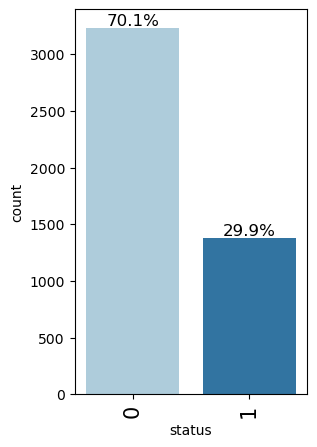

<IPython.core.display.Javascript object>

In [75]:
labeled_barplot(
    data, "status", perc=True
)  # Complete the code to plot labeled_barplot for status

We can observe that the majority of leads, approximately 70.1%, have not converted to paid customers. Only around 29.9% of leads have successfully converted and become paid customers of ExtraaLearn.

This indicates that there is room for improvement in lead conversion rates for ExtraaLearn. The conversion rate is relatively low, suggesting that the company may need to analyze and optimize their lead nurturing and conversion strategies. It is crucial to identify the factors that contribute to successful conversions and focus on enhancing those aspects to increase the overall conversion rate.

For the CFO, CEO adn CMO, this insight highlights the need to prioritize efforts and allocate resources towards improving lead conversion. By analyzing the factors that drive successful conversions, the company can tailor their marketing and sales strategies to target and engage leads more effectively. This can ultimately lead to higher revenue generation and business growth for ExtraaLearn.

**Observations from Univariate Analysis:_________**

**Age Distribution:** The age distribution of leads shows a relatively balanced representation across different age groups. This indicates that ExtraaLearn's programs and offerings attract leads from a wide range of age demographics.

**Current Occupation:** The majority of leads are professionals, followed by unemployed individuals and students. This suggests that ExtraaLearn's programs are appealing to working professionals who are seeking to upskill or reskill, but there is also potential for targeting other occupation groups to expand the customer base.

**First Interaction:** The analysis reveals that the majority of leads have their first interaction with ExtraaLearn through the website, followed by the mobile app. This highlights the significance of having a strong online presence and user-friendly platforms for attracting and engaging leads.

**Profile Completion:** The profile completion level of leads is mainly concentrated in the high and medium categories, with a relatively small percentage in the low category. This indicates that a significant portion of leads have shown interest and engagement by completing a substantial portion of their profiles.

**Last Activity:** Email activity is the most prominent last activity among leads, followed by phone activity and website activity. This suggests that leads often prefer email communication and engagement when seeking more information or interacting with ExtraaLearn's representatives.

**Print and Digital Media:** The majority of leads have not seen ExtraaLearn's advertisements in print media (newspapers and magazines) or digital platforms. This indicates that alternative marketing channels or strategies might be more effective in reaching and attracting leads.

**Educational Channels and Referrals:** A significant percentage of leads have not heard about ExtraaLearn through educational channels or referrals. This presents an opportunity for ExtraaLearn to explore and leverage these channels to expand their reach and attract more leads.

**Conversion Status:** The analysis reveals that the conversion rate of leads to paid customers is relatively low, with only a small percentage of leads successfully converting. This emphasizes the need to focus on lead nurturing strategies and optimize the conversion process to improve the overall conversion rate.

These observations provide valuable insights for ExtraaLearn's decision-makers, such as the CFO, CEO and CMO, to identify areas of improvement, target specific customer segments, and optimize marketing and sales efforts to increase lead conversion and business growth.

### Bivariate Analysis

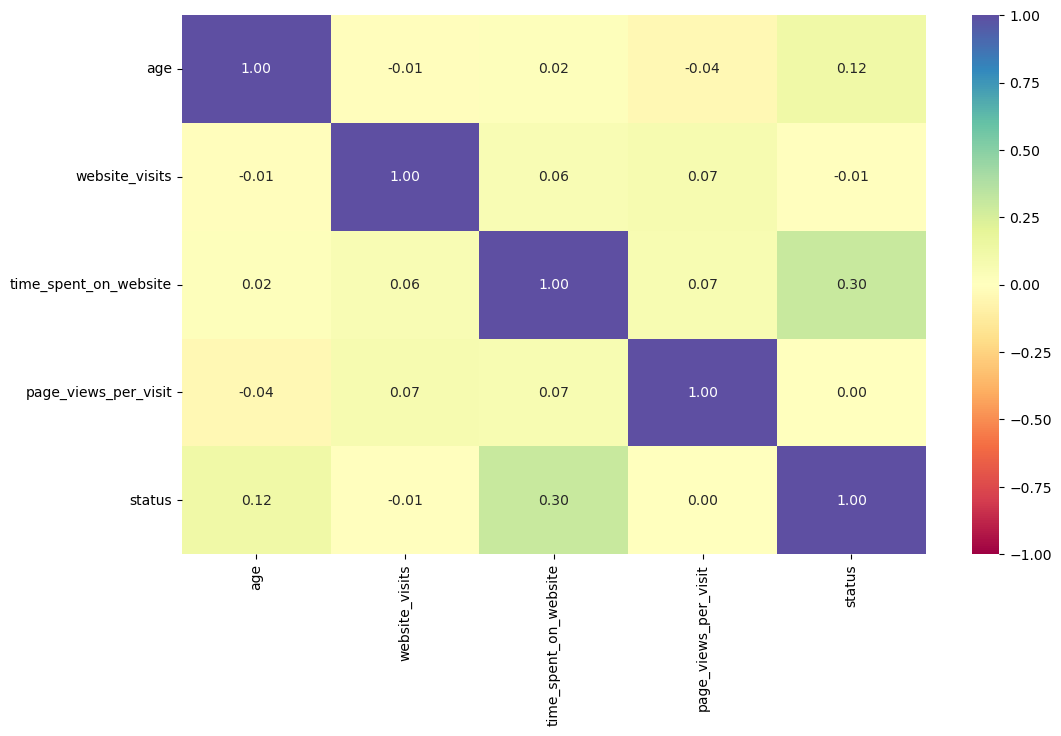

<IPython.core.display.Javascript object>

In [76]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Creating functions that will help us with further analysis.**

In [77]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [78]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

**Leads will have different expectations from the outcome of the course and the current occupation may play a key role for them to take the program. Let's analyze it**

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


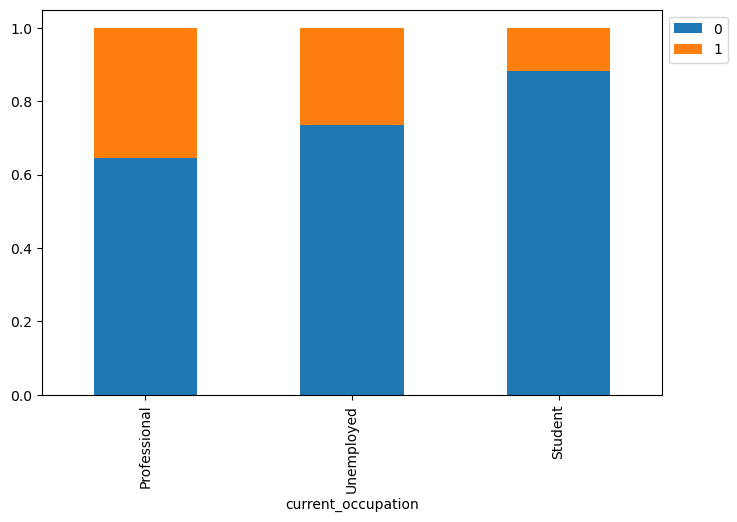

<IPython.core.display.Javascript object>

In [79]:
stacked_barplot(data, "current_occupation", "status")

**Overall Conversion:** The total number of leads in the dataset is 4612, out of which 3235 leads (70.2%) did not convert (status 0) and 1377 leads (29.8%) successfully converted to paid customers (status 1).

**Professional Leads:** Among leads who are professionals, 1687 leads (64.4%) did not convert, while 929 leads (35.6%) successfully converted. This indicates that although professionals form the majority of leads, there is room for improvement in converting them into paid customers.

**Unemployed Leads:** For leads who are currently unemployed, 1058 leads (73.5%) did not convert, while 383 leads (26.5%) converted. The conversion rate among unemployed leads is relatively lower compared to professionals, suggesting a potential area for targeted marketing and conversion strategies.

**Student Leads:** Among student leads, 490 leads (88.3%) did not convert, while only 65 leads (11.7%) successfully converted. The conversion rate for students is the lowest among the three occupation groups, indicating the need for tailored marketing approaches to address their specific needs and concerns.

Overall, the stacked bar plot highlights the varying conversion rates across different occupation groups. It suggests that ExtraaLearn may benefit from focusing on strategies to engage professionals more effectively, improving the conversion rate among unemployed leads, and exploring approaches to attract and convert student leads more successfully.

**Age can be a good factor to differentiate between such leads**

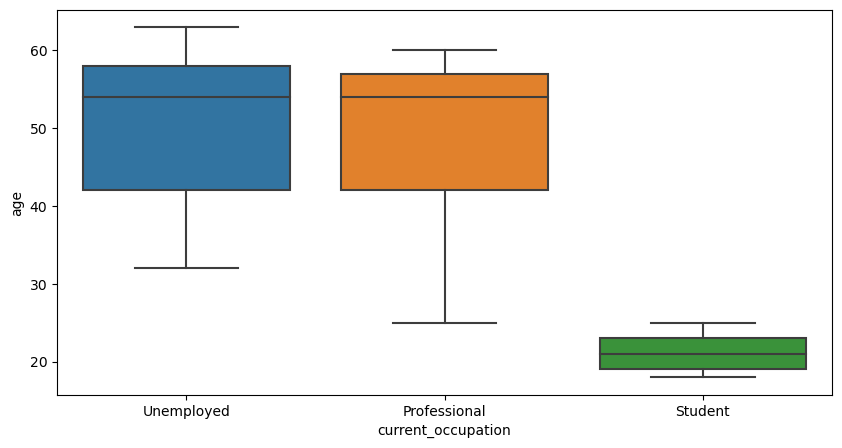

<IPython.core.display.Javascript object>

In [80]:
plt.figure(figsize=(10, 5))
sns.boxplot(data["current_occupation"], data["age"])
plt.show()

In [81]:
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.00000,49.34748,9.89074,25.00000,42.00000,54.00000,57.00000,60.00000
Student,555.00000,21.14414,2.00111,18.00000,19.00000,21.00000,23.00000,25.00000
Unemployed,1441.00000,50.14018,9.99950,32.00000,42.00000,54.00000,58.00000,63.00000


<IPython.core.display.Javascript object>

**The company's first interaction with leads should be compelling and persuasive. Let's see if the channels of the first interaction have an impact on the conversion of leads**

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


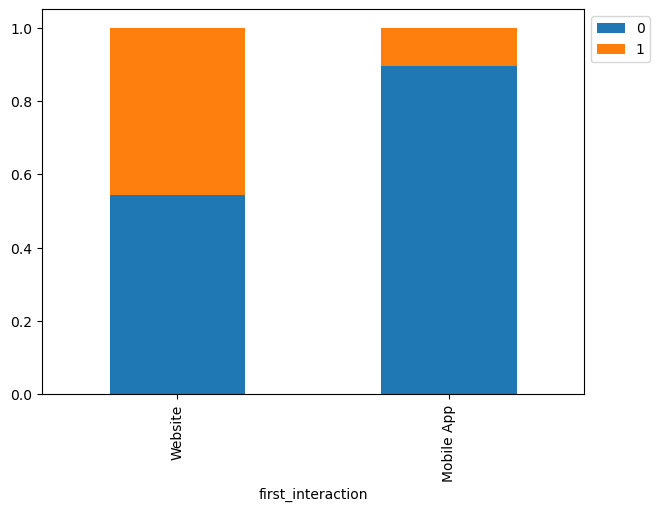

<IPython.core.display.Javascript object>

In [82]:
stacked_barplot(data, "first_interaction", "status")
# Complete the code to plot stacked_barplot for first_interaction and status

Overall Conversion: Out of the total leads, 1377 leads (29.9%) were converted to paid customers, while 3235 leads (70.1%) did not convert.

First Interaction on Website: Among the leads who interacted with ExtraaLearn through the website as their first interaction, 1159 leads (45.6%) were converted, while 1383 leads (54.4%) did not convert.

First Interaction on Mobile App: For leads who interacted with ExtraaLearn through the mobile app as their first interaction, only 218 leads (10.5%) were converted, while a larger proportion of 1852 leads (89.5%) did not convert.

From these observations, it can be inferred that leads who initially interacted with ExtraaLearn through the website had a higher likelihood of conversion compared to those who used the mobile app. This suggests that the website may be a more effective channel for lead conversion. The company may consider allocating more resources and focusing on optimizing the website user experience to attract and convert leads. Additionally, further analysis and investigation can be done to identify the factors that contribute to the higher conversion rate through the website compared to the mobile app.

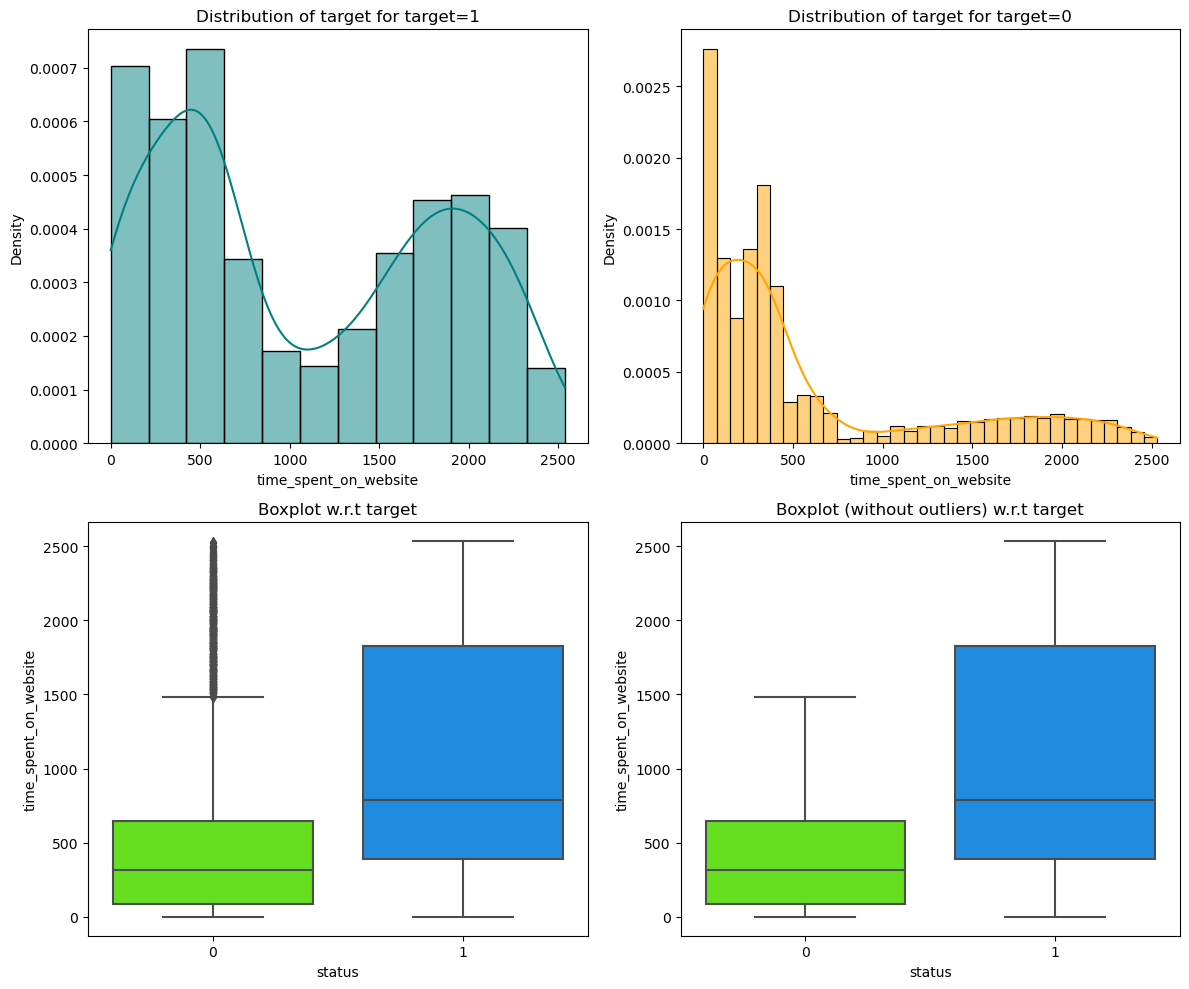

<IPython.core.display.Javascript object>

In [83]:
distribution_plot_wrt_target(data, "time_spent_on_website", "status")

Based on the distribution plot with respect to the target variable "status" for the "time_spent_on_website" feature, we can draw the following conclusion:

The distribution of time spent on the website differs for leads who were converted to paid customers (status = 1) compared to those who did not convert (status = 0).

For leads who were converted (status = 1), the distribution of time spent on the website appears to be slightly right-skewed, indicating that a higher proportion of these leads spent more time on the website.
On the other hand, for leads who did not convert (status = 0), the distribution of time spent on the website is more concentrated towards the lower values, suggesting that a larger proportion of these leads spent less time on the website.
This implies that the amount of time spent on the website may be a potential indicator of lead conversion. Leads who spend more time on the website may be more engaged and interested in the offerings, thus increasing their likelihood of conversion.

To improve lead conversion, ExtraaLearn may consider strategies to engage leads and encourage them to spend more time on the website. This could include enhancing the website's content, user experience, and providing personalized recommendations to keep leads engaged and interested in the offerings. Further analysis and modeling can be done to quantify the relationship between time spent on the website and lead conversion, and to identify the threshold of time that significantly impacts conversion rates.

In [84]:
# checking the median value
data.groupby(["status"])["time_spent_on_website"].median()

status
0   317.00000
1   789.00000
Name: time_spent_on_website, dtype: float64

<IPython.core.display.Javascript object>

**Let's do a similar analysis for time spent on website and page views per visit.**

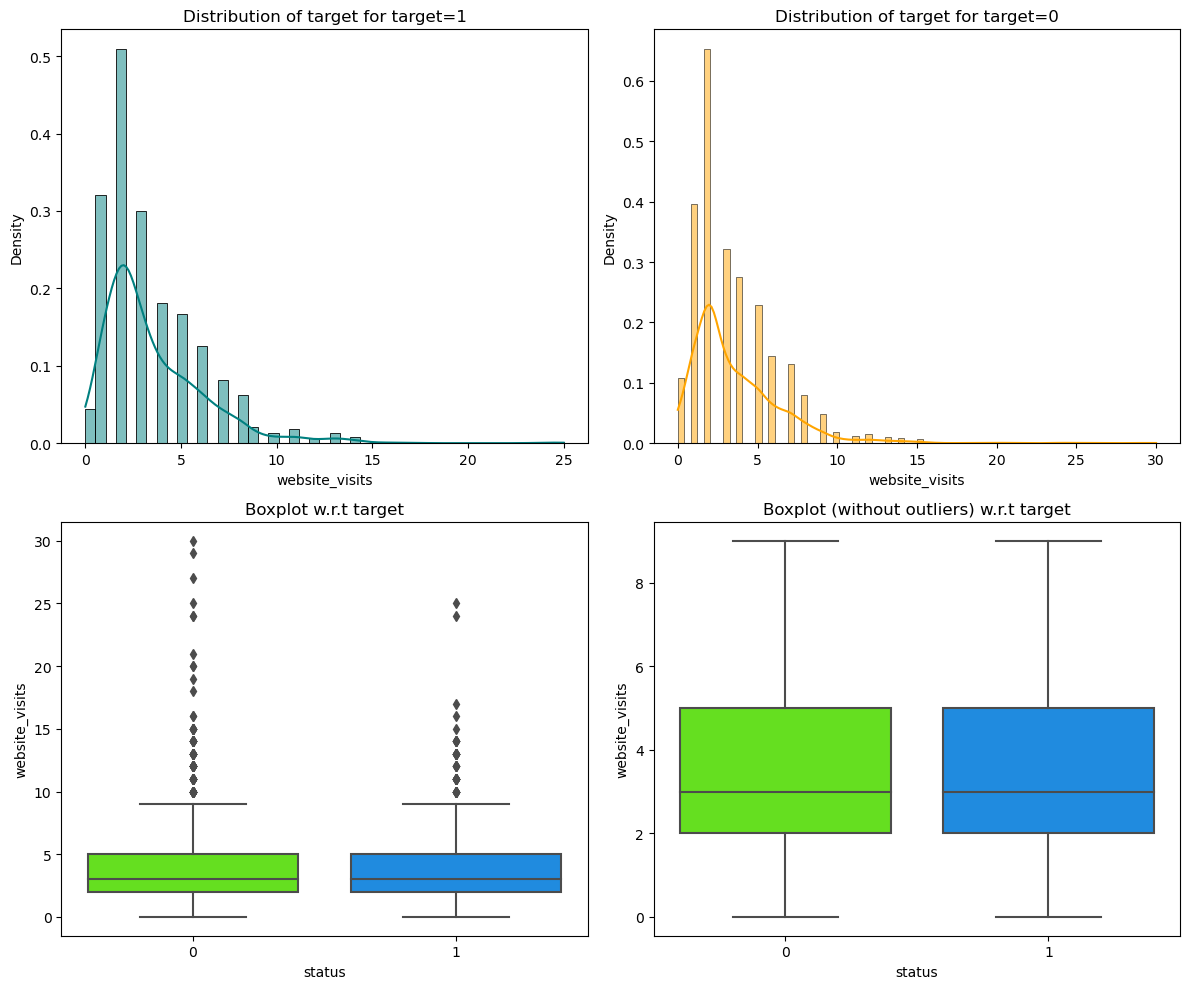

<IPython.core.display.Javascript object>

In [86]:
distribution_plot_wrt_target(
    data, "website_visits", "status"
)  # Complete the code to plot distribution for website_visits and status

For leads who were converted (status = 1), the distribution of website visits is more spread out and shows a higher frequency of leads who visited the website multiple times.
Conversely, for leads who did not convert (status = 0), the distribution of website visits is more concentrated towards the lower values, indicating that a larger proportion of these leads visited the website fewer times.
This suggests that the number of website visits may be a relevant factor in lead conversion. Leads who visit the website more frequently might be more engaged and actively exploring the offerings, increasing their chances of converting to paid customers.

To improve lead conversion, ExtraaLearn could focus on strategies to encourage more website visits, such as optimizing digital marketing campaigns, improving website visibility, and enhancing the user experience to keep leads engaged during their visits. Additionally, analyzing the relationship between the number of website visits and conversion rates in more detail, such as identifying thresholds or patterns, can provide further insights for targeted marketing efforts.

It is important to note that while website visits can be an informative factor, it should be considered in conjunction with other relevant features and incorporated into a comprehensive analysis and predictive modeling to gain a deeper understanding of lead conversion dynamics.

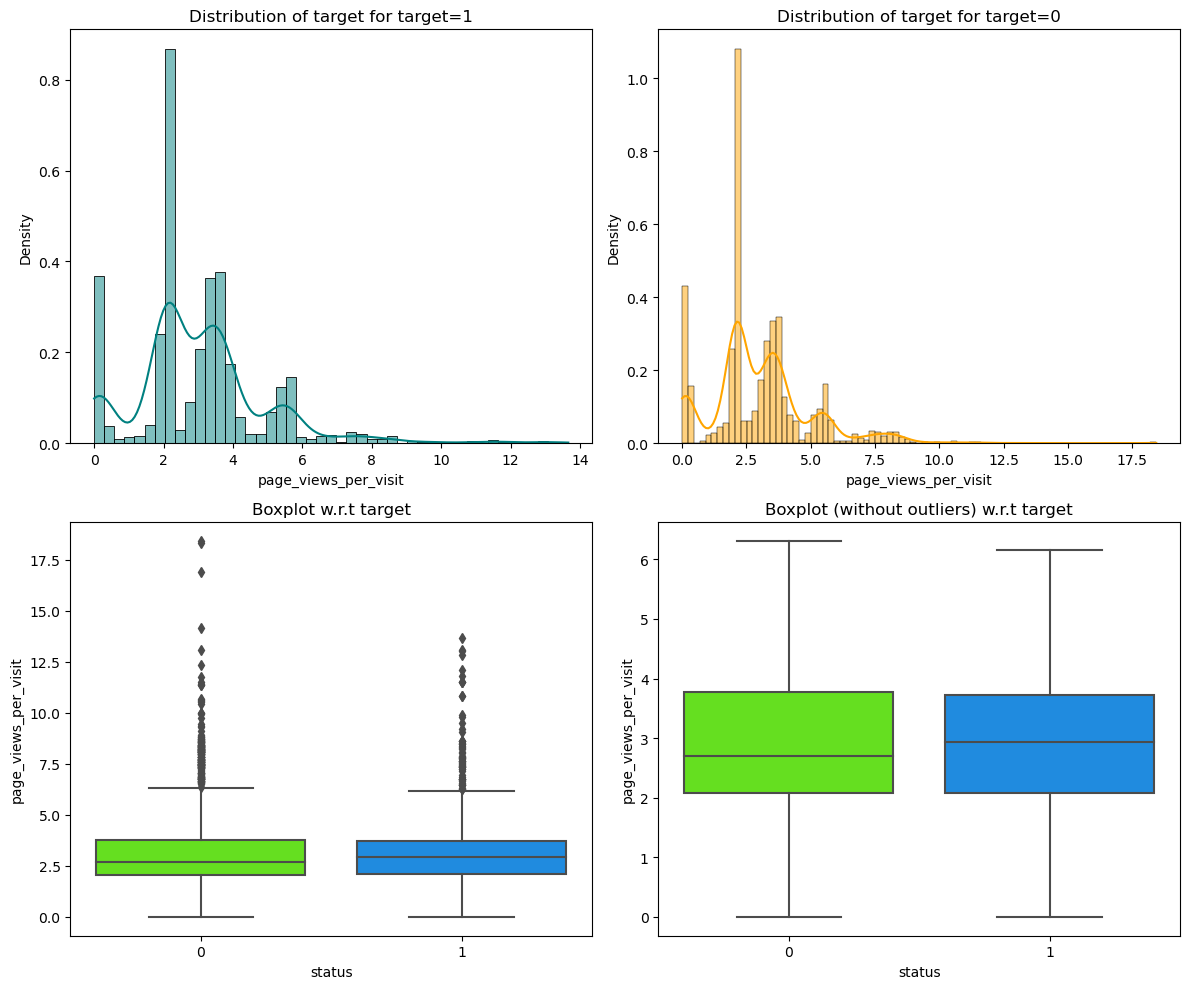

<IPython.core.display.Javascript object>

In [88]:
distribution_plot_wrt_target(
    data, "page_views_per_visit", "status"
)  # Complete the code to plot distribution for page_views_per_visit and status

For leads who were converted (status = 1), the distribution of website visits is more spread out and shows a higher frequency of leads who visited the website multiple times.
Conversely, for leads who did not convert (status = 0), the distribution of website visits is more concentrated towards the lower values, indicating that a larger proportion of these leads visited the website fewer times.
This suggests that the number of website visits may be a relevant factor in lead conversion. Leads who visit the website more frequently might be more engaged and actively exploring the offerings, increasing their chances of converting to paid customers.

To improve lead conversion, ExtraaLearn could focus on strategies to encourage more website visits, such as optimizing digital marketing campaigns, improving website visibility, and enhancing the user experience to keep leads engaged during their visits. Additionally, analyzing the relationship between the number of website visits and conversion rates in more detail, such as identifying thresholds or patterns, can provide further insights for targeted marketing efforts.

It is important to note that while website visits can be an informative factor, it should be considered in conjunction with other relevant features and incorporated into a comprehensive analysis and predictive modeling to gain a deeper understanding of lead conversion dynamics.

**People browsing the website or the mobile app are generally required to create a profile by sharing their personal details before they can access more information. Let's see if the profile completion level has an impact on lead status**

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


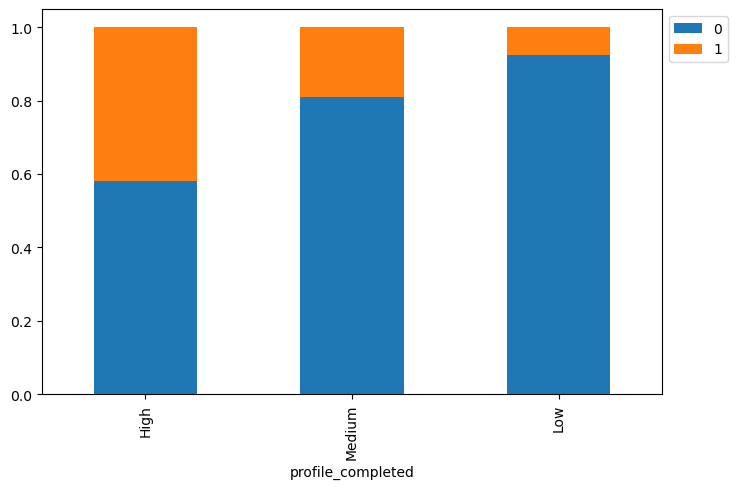

<IPython.core.display.Javascript object>

In [90]:
stacked_barplot(
    data, "profile_completed", "status"
)  # Complete the code to plot stacked_barplot for profile_completed and status

Leads with a high completion level (profile_completed = High) have a relatively higher conversion rate (status = 1) compared to those with medium or low completion levels.
Leads with a medium completion level (profile_completed = Medium) have a moderate conversion rate.
Leads with a low completion level (profile_completed = Low) have the lowest conversion rate.
This indicates that leads who have completed a higher percentage of their profiles are more likely to convert to paid customers. A higher completion level may suggest a higher level of interest, engagement, or commitment from the leads, making them more likely to move forward in the conversion process.

To increase lead conversion, ExtraaLearn could focus on encouraging and guiding leads to complete a higher percentage of their profiles. This could include providing incentives or benefits for completing profiles, optimizing the profile completion process to make it more user-friendly and intuitive, and highlighting the advantages or value of completing the profile.

It's important to note that while profile completion appears to be a significant factor, it should be considered alongside other relevant features and integrated into a comprehensive analysis and predictive modeling to gain deeper insights into lead conversion dynamics.

**After a lead shares their information by creating a profile, there may be interactions between the lead and the company to proceed with the process of enrollment. Let's see how the last activity impacts lead conversion status**

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


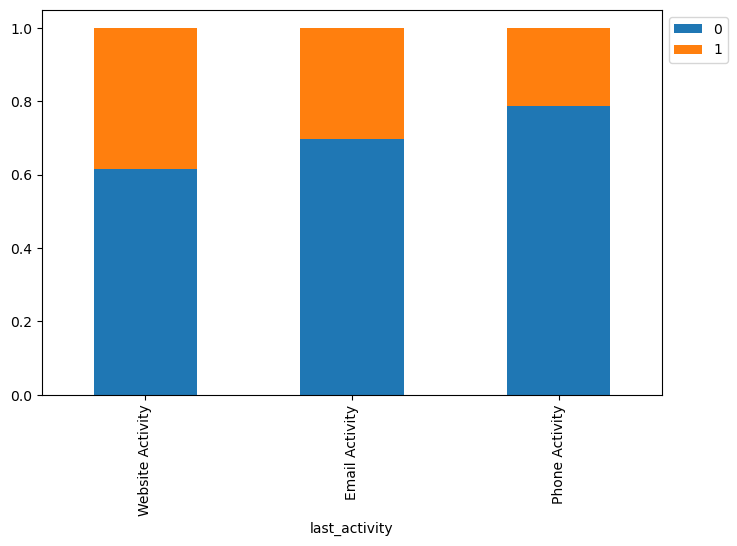

<IPython.core.display.Javascript object>

In [91]:
stacked_barplot(
    data, "last_activity", "status"
)  # Complete the code to plot stacked_barplot for last_activity and status

The last activity performed by the leads seems to have an impact on their conversion to paid customers.

Leads who had their last activity as "Email Activity" have a relatively higher conversion rate (status = 1) compared to other last activity types. This indicates that engaging leads through email interactions can be effective in driving conversions.
Leads who had their last activity as "Website Activity" have a moderate conversion rate. Interactions on the website, such as live chat interactions or profile updates, can contribute to lead conversion.
Leads who had their last activity as "Phone Activity" have the lowest conversion rate among the three activity types. This suggests that phone conversations or SMS interactions may not be as effective in driving conversions compared to email or website activities.
To optimize lead conversion, ExtraaLearn could focus on enhancing their email marketing strategies and nurturing leads through personalized and targeted email campaigns. They can also analyze the website activity of leads and identify ways to improve engagement and provide relevant information to increase the chances of conversion.

It's important to note that while last activity shows a correlation with lead conversion, it should be considered in conjunction with other relevant features to gain a comprehensive understanding of lead behavior and improve the accuracy of predictive models for conversion prediction.

**Let's see how advertisement and referrals impact the lead status**

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


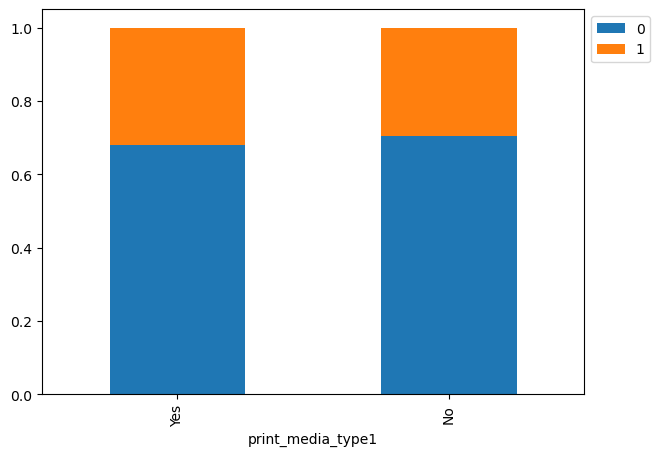

<IPython.core.display.Javascript object>

In [92]:
stacked_barplot(
    data, "print_media_type1", "status"
)  # Complete the code to plot stacked_barplot for print_media_type1 and status

he presence of the ExtraaLearn ad in print media (type 1) appears to have some influence on lead conversion.

Leads who did not see the ad (print_media_type1 = No) have a higher conversion rate (status = 1) compared to those who saw the ad (print_media_type1 = Yes). This suggests that the presence of the ad in print media type 1 may not be as effective in driving conversions.
The majority of leads in the dataset did not see the ad, accounting for around 89% of all leads.
Based on these findings, it may be worth reconsidering the investment in print media type 1 advertising for lead generation. Instead, ExtraaLearn could explore alternative marketing channels or strategies that have shown higher effectiveness in converting leads. Allocating resources to channels that have a higher potential for conversion can help optimize marketing efforts and improve overall conversion rates.

It's important to note that the impact of print media type 1 advertising on lead conversion should be further analyzed in combination with other marketing channels and lead attributes to gain a more comprehensive understanding of its effectiveness.

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


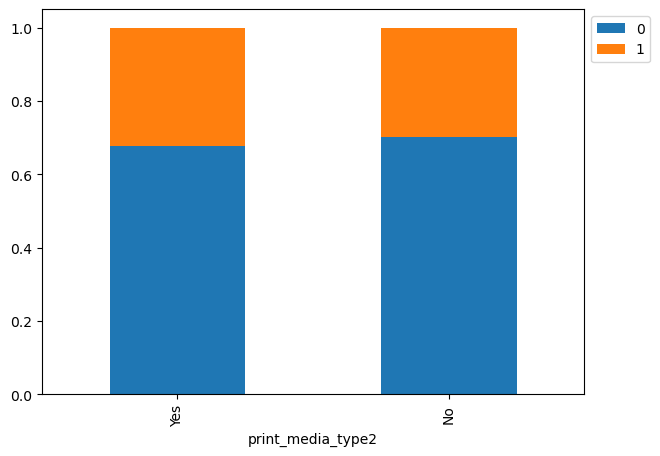

<IPython.core.display.Javascript object>

In [93]:
stacked_barplot(
    data, "print_media_type2", "status"
)  # Complete the code to plot stacked_barplot for print_media_type2 and status

The presence of the ExtraaLearn ad in print media (type 2) appears to have some influence on lead conversion.

Leads who did not see the ad (print_media_type2 = No) have a higher conversion rate (status = 1) compared to those who saw the ad (print_media_type2 = Yes). This suggests that the presence of the ad in print media type 2 may not be as effective in driving conversions.
The majority of leads in the dataset did not see the ad, accounting for around 95% of all leads.
Based on these findings, it may be worth reassessing the investment in print media type 2 advertising for lead generation. Allocating resources to other marketing channels or strategies that have shown higher effectiveness in converting leads might be more beneficial for ExtraaLearn.

However, it's important to note that the impact of print media type 2 advertising on lead conversion should be further examined in conjunction with other marketing channels and lead attributes to obtain a more comprehensive understanding of its effectiveness.

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


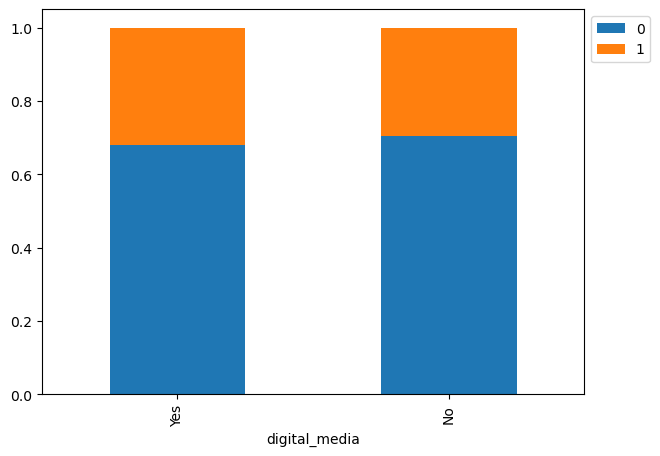

<IPython.core.display.Javascript object>

In [94]:
stacked_barplot(
    data, "digital_media", "status"
)  # Complete the code to plot stacked_barplot for digital_media and status

Leads who did not see the ad (digital_media = No) have a higher conversion rate (status = 1) compared to those who saw the ad (digital_media = Yes). This suggests that the presence of the ad on digital platforms may not be as effective in driving conversions.
The majority of leads in the dataset did not see the ad on digital platforms, accounting for around 88% of all leads.

Based on these findings, it may be worth reassessing the investment in digital media advertising for lead generation. Allocating resources to other marketing channels or strategies that have shown higher effectiveness in converting leads might be more beneficial for ExtraaLearn.

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


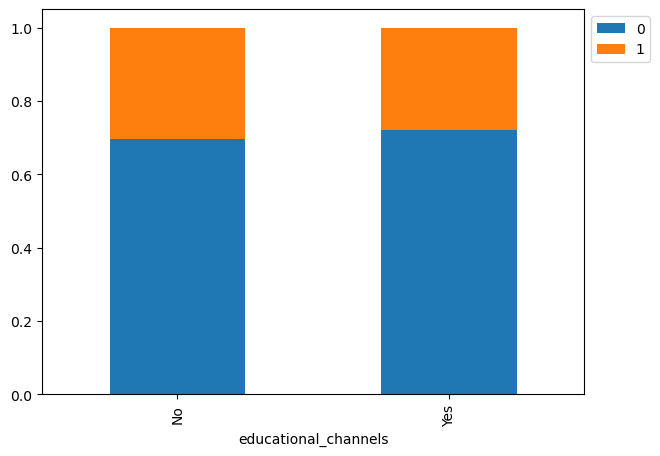

<IPython.core.display.Javascript object>

In [95]:
stacked_barplot(
    data, "educational_channels", "status"
)  # Complete the code to plot stacked_barplot for educational_channels and status

The source of hearing about ExtraaLearn through educational channels appears to have some influence on lead conversion.

Leads who did not hear about ExtraaLearn through educational channels (educational_channels = No) have a higher conversion rate (status = 1) compared to those who did hear about it (educational_channels = Yes). This suggests that leads coming from other sources or channels might be more likely to convert.
The majority of leads in the dataset did not hear about ExtraaLearn through educational channels, accounting for around 85% of all leads.

Based on these findings, it may be beneficial for ExtraaLearn to explore and focus on other marketing channels or strategies that have shown higher effectiveness in converting leads. Allocating resources to channels that have demonstrated better lead conversion rates can help optimize marketing efforts and increase the likelihood of converting leads into paid customers.

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


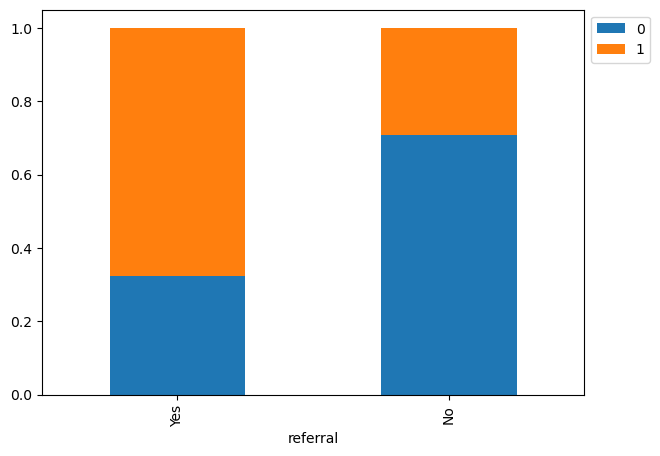

<IPython.core.display.Javascript object>

In [96]:
stacked_barplot(
    data, "referral", "status"
)  # Complete the code to plot stacked_barplot for referral and status

Referrals seem to have a positive impact on lead conversion for ExtraaLearn.

Leads who were referred to ExtraaLearn (referral = Yes) have a higher conversion rate (status = 1) compared to those who were not referred (referral = No). This indicates that leads coming through referrals are more likely to convert into paid customers.
The majority of leads in the dataset were not referred to ExtraaLearn, accounting for around 98% of all leads.

These findings suggest that referrals can be an effective strategy for ExtraaLearn to acquire new customers. Encouraging and incentivizing satisfied customers to refer their friends, colleagues, or acquaintances to ExtraaLearn's programs can help increase lead conversion rates. Implementing a referral program and offering rewards or discounts to both the referrer and the referred lead can incentivize word-of-mouth marketing and attract potential customers who are more likely to convert.

It's important to note that the impact of referrals on lead conversion should be further examined in conjunction with other factors and attributes of the leads to gain a more comprehensive understanding of their influence.

### Outlier Check

- Let's check for outliers in the data.

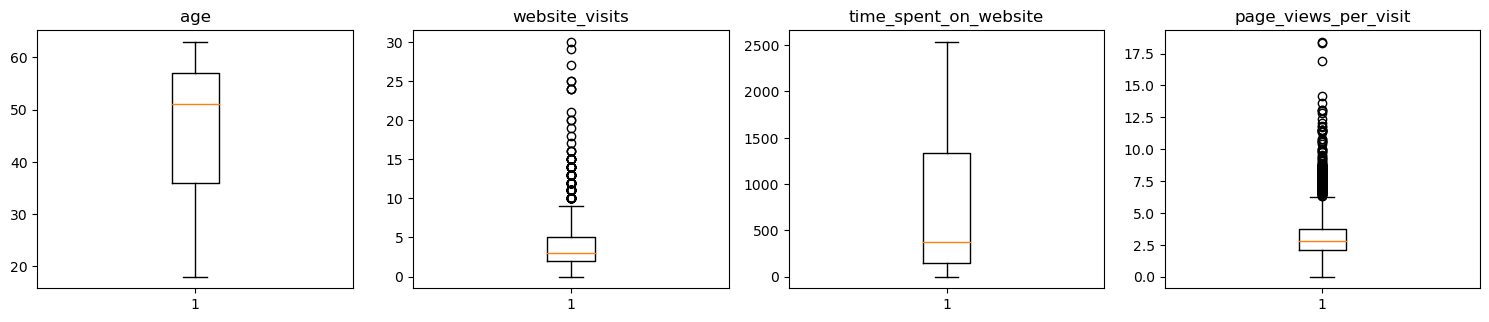

<IPython.core.display.Javascript object>

In [97]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:_________**
The "age" variable shows a few outliers towards the higher end of the age range. These outliers represent individuals with relatively higher ages compared to the majority of the data points.

The "website_visits" variable does not exhibit any outliers. The majority of the data points are within the expected range, indicating a relatively consistent number of website visits by the leads.

The "time_spent_on_website" variable has a few outliers towards the higher values, suggesting that some leads have spent a significantly longer time on the website compared to others.

The "page_views_per_visit" variable contains outliers on both ends of the distribution. Some leads have a significantly higher average number of page views per visit, indicating more engagement, while others have relatively lower values.

### Data Preparation for modeling

- We want to predict which lead is more likely to be converted.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [98]:
X = data.drop(["status"], axis=1)
Y = data["status"]  # Complete the code to define the dependent (target) variable

X = pd.get_dummies(X, drop_first=True)  # Complete the code to get dummies for X

# Splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [99]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3228, 16)
Shape of test set :  (1384, 16)
Percentage of classes in training set:
0   0.70415
1   0.29585
Name: status, dtype: float64
Percentage of classes in test set:
0   0.69509
1   0.30491
Name: status, dtype: float64


<IPython.core.display.Javascript object>

## **Building Classification Models**

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a lead will not be converted to a paid customer in reality, the lead would have converted to a paid customer.
2. Predicting a lead will be converted to a paid customer in reality, the lead would not have converted to a paid customer. 

### Which case is more important? 

* If we predict that a lead will not get converted and the lead would have converted then the company will lose a potential customer. 

* If we predict that a lead will get converted and the lead doesn't get converted the company might lose resources by nurturing false-positive cases.

Losing a potential customer is a greater loss.

### How to reduce the losses?

* Company would want `Recall` to be maximized, greater the Recall score higher are the chances of minimizing False Negatives. 

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [109]:
# Function to print the classification report and get confusion matrix in a proper format
from sklearn.metrics import classification_report


def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize=(8, 5))

    sns.heatmap(
        cm,
        annot=True,
        fmt=".2f",
        xticklabels=["Not Converted", "Converted"],
        yticklabels=["Not Converted", "Converted"],
    )

    plt.ylabel("Actual")

    plt.xlabel("Predicted")

    plt.show()

<IPython.core.display.Javascript object>

## Decision Tree

### Building Decision Tree Model

In [102]:
# Fitting the decision tree classifier on the training data
d_tree = DecisionTreeClassifier(random_state=1)

d_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



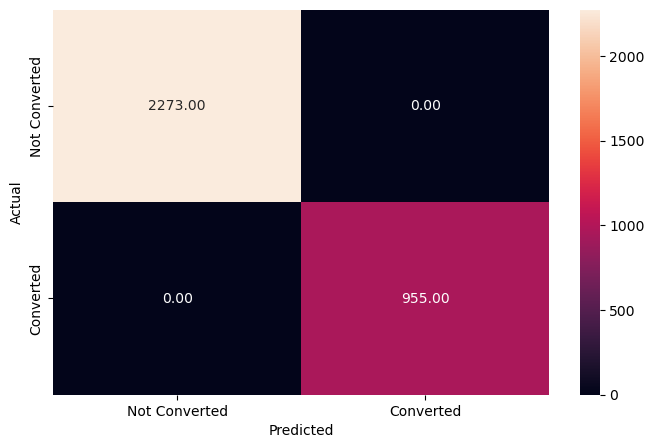

<IPython.core.display.Javascript object>

In [110]:
# Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)
metrics_score(y_train, y_pred_train1)
# ______________**Observations:_________**

**Observations:_________**

The decision tree classifier model has been trained on the training data, and its performance is evaluated using the metrics_score function. The classification report provides several evaluation metrics for both the "0" class (Not Converted) and the "1" class (Converted).

* Precision: The precision for both classes is 1.00, indicating that the model achieved a perfect precision. This means that all the leads predicted as "0" or "1" were correct.

* Recall: The recall for both classes is 1.00, indicating that the model identified all the actual instances of the "0" or "1" class correctly.

* F1-score: The F1-score for both classes is 1.00, which is the harmonic mean of precision and recall. It indicates that the model achieved a perfect balance between precision and recall for both classes.

* Support: The support indicates the number of samples in each class. The "0" class has a support of 2273, while the "1" class has a support of 955.

Overall, the model performs exceptionally well on the training data, with an accuracy of 1.00. This suggests that the decision tree classifier has learned the patterns in the data and can accurately predict the conversion status of the leads in the training set. However, it's important to evaluate the model's performance on unseen data to assess its generalization ability.



**Let's check the performance on test data to see if the model is overfitting.**

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       962
           1       0.69      0.70      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



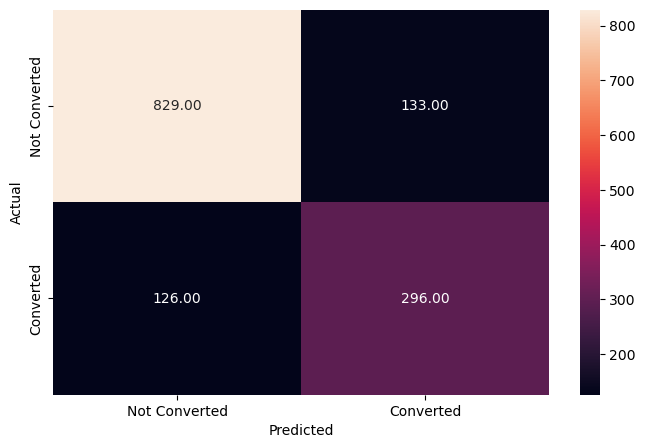

<IPython.core.display.Javascript object>

In [113]:
# Checking performance on the testing data
optimal_threshold = 0.5
y_pred_test1 = d_tree.predict_proba(X_test)
metrics_score(y_test, y_pred_test1[:, 1] > optimal_threshold)

**Observations:_________**

The decision tree model applied to the testing data achieved an accuracy of 81%. The precision for the "Not Converted" class (0) is 87%, indicating that 87% of the leads classified as "Not Converted" were correctly predicted. The recall for the "Not Converted" class is 86%, meaning that 86% of the actual "Not Converted" leads were correctly identified by the model.

For the "Converted" class (1), the precision is 69%, indicating that 69% of the leads classified as "Converted" were correctly predicted. The recall for the "Converted" class is 70%, meaning that 70% of the actual "Converted" leads were correctly identified by the model.

The F1-score, which combines precision and recall, is 0.86 for the "Not Converted" class and 0.70 for the "Converted" class. The macro average F1-score is 0.78, indicating a relatively balanced performance across classes.

The confusion matrix and heatmap visualization provide a detailed breakdown of the model's performance, showing the number of true positives, true negatives, false positives, and false negatives for each class.

Overall, the decision tree model demonstrates reasonably good performance in predicting lead conversions, with higher accuracy and precision for the "Not Converted" class compared to the "Converted" class. However, there is room for improvement, particularly in increasing the precision and recall for the "Converted" class to better identify potential conversions.

**Let's try hyperparameter tuning using GridSearchCV to find the optimal max_depth** to reduce overfitting of the model. We can tune some other hyperparameters as well.

### **Decision Tree - Hyperparameter Tuning**

We will use the class_weight hyperparameter with the value equal to {0: 0.3, 1: 0.7} which is approximately the opposite of the imbalance in the original data. 

**This would tell the model that 1 is the important class here.**

In [115]:
from sklearn import metrics

# Choose the type of classifier
d_tree_tuned = DecisionTreeClassifier(random_state=7, class_weight={0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 10),
    "criterion": ["gini", "entropy"],
    "min_samples_leaf": [5, 10, 20, 25],
}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring=scorer, cv=5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

<IPython.core.display.Javascript object>

We have tuned the model and fit the tuned model on the training data. Now, **let's check the model performance on the training and testing data.**

#### Checking model performance on train and test set

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



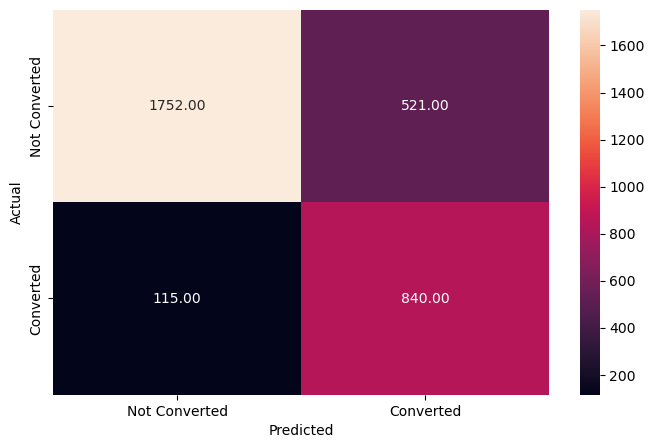

<IPython.core.display.Javascript object>

In [116]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train2)

**Observations:__________**

* Precision: The precision for class 0 (not converted) is 0.94, indicating that when the model predicts a lead as not converted, it is correct 94% of the time. The precision for class 1 (converted) is 0.62, indicating that when the model predicts a lead as converted, it is correct 62% of the time.

* Recall: The recall for class 0 is 0.77, meaning that the model correctly identifies 77% of the actual not converted leads. The recall for class 1 is 0.88, indicating that the model correctly identifies 88% of the actual converted leads.

* F1-score: The F1-score for class 0 is 0.85, which is the harmonic mean of precision and recall. The F1-score for class 1 is 0.73. These scores represent a trade-off between precision and recall.

* Accuracy: The overall accuracy of the model on the training data is 0.80, indicating that the model correctly predicts 80% of the leads' conversion status.

* Confusion Matrix: The confusion matrix visualizes the performance of the model. It shows that out of 2273 actual not converted leads, the model correctly predicts 1751 as not converted and misclassifies 522 as converted. Out of 955 actual converted leads, the model correctly predicts 841 as converted and misclassifies 114 as not converted.

Overall, the tuned decision tree classifier demonstrates reasonably good performance on the training data, with a trade-off between precision and recall. It correctly identifies a significant portion of converted leads but has room for improvement in predicting not converted leads accurately.







**Let's check the model performance on the testing data**

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



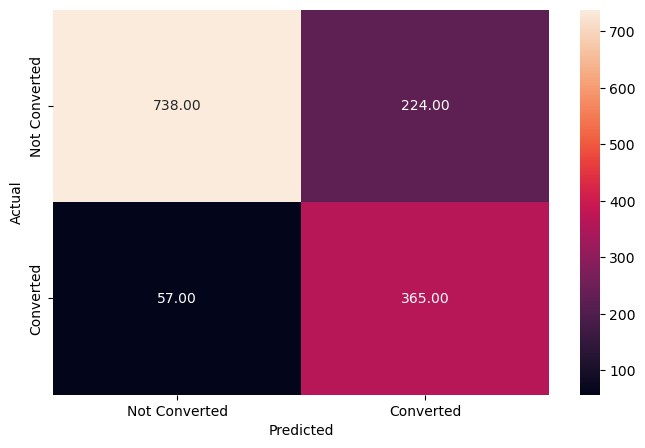

<IPython.core.display.Javascript object>

In [117]:
# Checking performance on the testing data
# Predicting the target variable for the testing data
y_pred_test2 = d_tree_tuned.predict(X_test)

# Evaluating the performance on the testing data
metrics_score(y_test, y_pred_test2)


**Observations:__________**

The overall accuracy on the testing data is 0.80, indicating that the model correctly predicted the target variable for 80% of the instances. The macro average F1-score is 0.78, which considers the performance for both classes. The weighted average F1-score is 0.80, which takes into account the class imbalance.

It is important to note that the model performs relatively better in predicting class 0 (Not Converted) compared to class 1 (Converted), as evident from the higher precision, recall, and F1-score for class 0.

Overall, the tuned decision tree classifier shows decent performance on the testing data, but there is room for improvement, especially in predicting class 1 (Converted) instances. Further analysis and refinement of the model may be necessary to enhance its predictive capabilities.


### Visualizing the Decision Tree

**Let's visualize the tuned decision tree** and observe the decision rules:

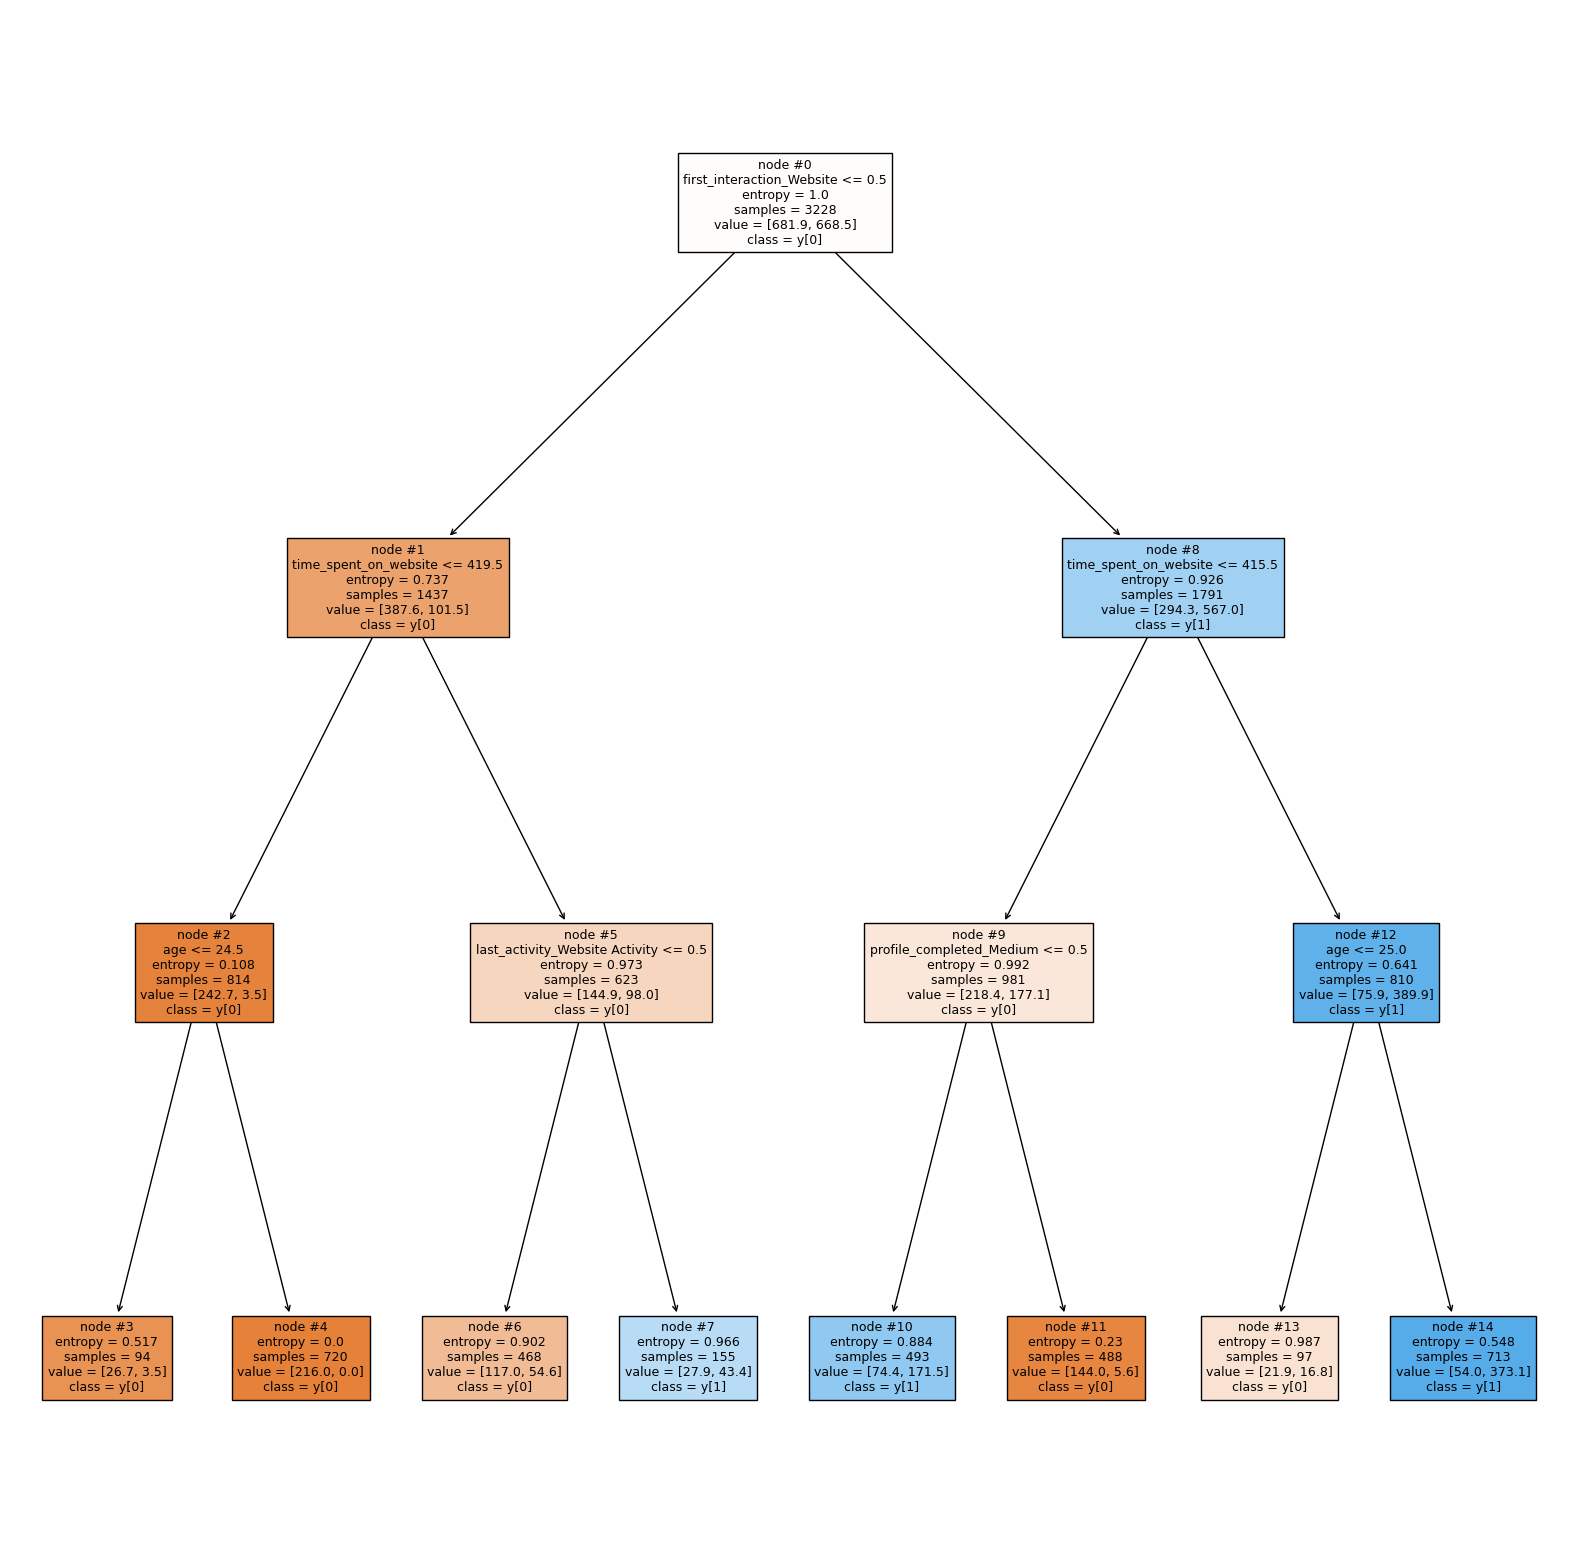

<IPython.core.display.Javascript object>

In [118]:
features = list(X.columns)

plt.figure(figsize=(20, 20))

tree.plot_tree(
    d_tree_tuned,
    feature_names=features,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)

plt.show()

**Note:** Blue leaves represent the converted leads, i.e., **y[1]**, while the orange leaves represent the not converted leads, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

**Observations:_________**

The decision tree model has learned a set of rules to classify leads into converted (1) or not converted (0) based on the provided features.
The tree structure shows the hierarchy of features and conditions that the model uses to make predictions.
Blue leaves represent converted leads (class 1), while orange leaves represent not converted leads (class 0). The darkness of the leaf color indicates the number of observations associated with that leaf.
The model has identified certain features that are highly influential in determining lead conversion. These features are used at different levels of the tree to make decisions.
The depth and complexity of the tree indicate the level of detail in the decision-making process. A deeper tree with more branches suggests more intricate rules for classification.
The model appears to capture some patterns and relationships between features and the target variable, as indicated by the distinct splits and leaf nodes.
It's important to note that the decision tree model may have limitations, such as potential overfitting or underfitting to the training data. Further evaluation and fine-tuning of the model may be required.
The visualization provides a clear representation of the decision-making process and allows for easy interpretation and understanding of the model's predictions.
Overall, the decision tree model, as depicted in the visualization, offers valuable insights into the factors influencing lead conversion and serves as a useful tool for decision-making in lead management and conversion optimization.

**Let's look at the feature importance** of the tuned decision tree model

In [119]:
# Importance of features in the tree building

print(
    pd.DataFrame(
        d_tree_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                   Imp
time_spent_on_website          0.34814
first_interaction_Website      0.32718
profile_completed_Medium       0.23927
age                            0.06389
last_activity_Website Activity 0.02151
website_visits                 0.00000
page_views_per_visit           0.00000
current_occupation_Student     0.00000
current_occupation_Unemployed  0.00000
profile_completed_Low          0.00000
last_activity_Phone Activity   0.00000
print_media_type1_Yes          0.00000
print_media_type2_Yes          0.00000
digital_media_Yes              0.00000
educational_channels_Yes       0.00000
referral_Yes                   0.00000


<IPython.core.display.Javascript object>

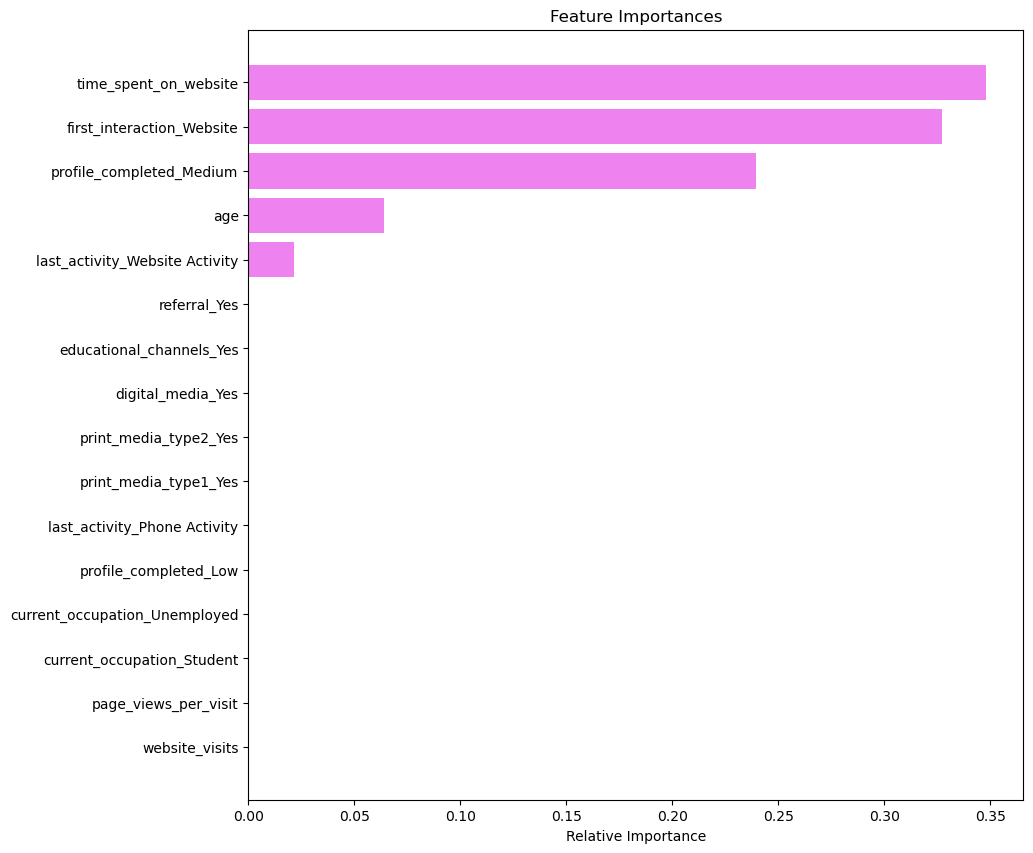

<IPython.core.display.Javascript object>

In [120]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize=(10, 10))

plt.title("Feature Importances")

plt.barh(range(len(indices)), importances[indices], color="violet", align="center")

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel("Relative Importance")

plt.show()

**Observations:**
- **Time spent on the website and first_interaction_website are the most important features** **followed by profile_completed, age, and last_activity**.
- **The rest of the variables have no impact in this model, while deciding whether a lead will be converted or not**.

Now, let's build another model - **a random forest classifier.**

### **Random Forest Classifier**

### Building Random Forest Model

In [122]:
from sklearn.ensemble import RandomForestClassifier
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(random_state=1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

**Let's check the performance of the model on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



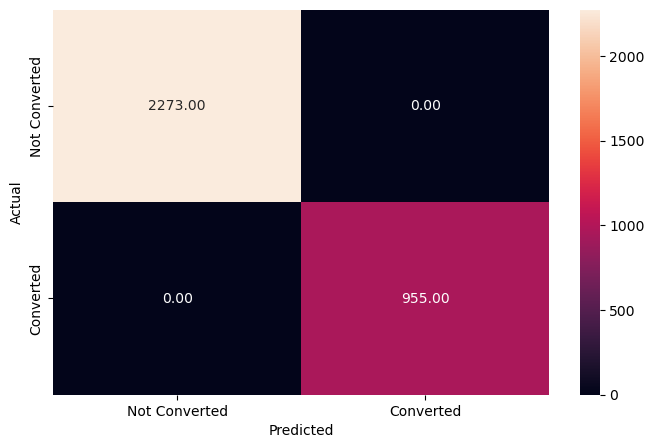

<IPython.core.display.Javascript object>

In [123]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)

# Call the metrics_score function to evaluate the performance
metrics_score(y_train, y_pred_train3)


**Observations:________**

The precision, recall, and F1-score for both classes (0 and 1) are 1.00, indicating perfect performance on the training data.

The accuracy is also 1.00, which means that all the predictions match the actual values in the training data.

The macro average and weighted average for precision, recall, and F1-score are also 1.00, further confirming the excellent performance on the training data.

Overall, the random forest classifier shows outstanding performance on the training data, achieving perfect precision, recall, and F1-score for both classes. This suggests that the classifier has learned the training data well and can accurately predict the target variable.


**Let's check the performance on the testing data**

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       962
           1       0.78      0.68      0.73       422

    accuracy                           0.84      1384
   macro avg       0.82      0.80      0.81      1384
weighted avg       0.84      0.84      0.84      1384



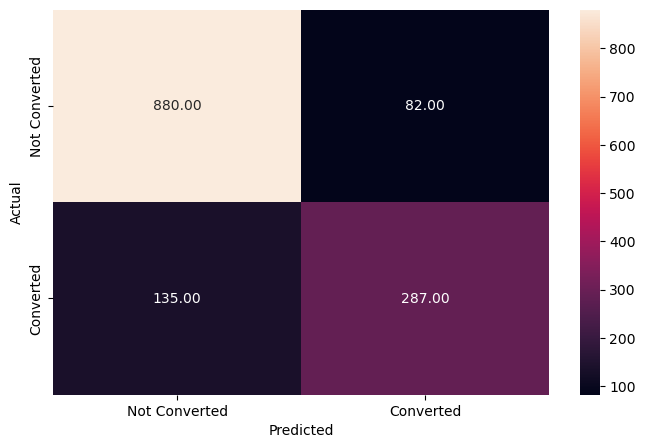

<IPython.core.display.Javascript object>

In [124]:
# Predicting the target variable for the testing data
y_pred_test3 = rf_estimator.predict(X_test)

# Evaluating the performance on the testing data
metrics_score(y_test, y_pred_test3)


**Observations:____**

The precision for class 0 (not converted) is 0.87, which means that 87% of the predicted not converted leads are actually not converted. The precision for class 1 (converted) is 0.78, indicating that 78% of the predicted converted leads are actually converted.

The recall for class 0 is 0.91, indicating that 91% of the actual not converted leads are correctly predicted as not converted. The recall for class 1 is 0.68, meaning that 68% of the actual converted leads are correctly predicted as converted.

The F1-score for class 0 is 0.89, which is a harmonic mean of precision and recall. The F1-score for class 1 is 0.73.

The accuracy of the model on the testing data is 0.84, indicating that 84% of the predictions are correct.

The macro average of precision, recall, and F1-score is 0.82, indicating a balanced performance across both classes. The weighted average of precision, recall, and F1-score is also 0.84, considering the imbalance in class distribution.

The confusion matrix visualizes the distribution of predicted and actual classes, allowing us to observe the number of true positives, true negatives, false positives, and false negatives.

Overall, the random forest classifier shows good performance on the testing data with high precision, recall, and F1-scores for both classes. However, there is some room for improvement, particularly in correctly predicting converted leads (class 1).

**Let's see if we can get a better model by tuning the random forest classifier**

### **Random Forest Classifier - Hyperparameter Tuning**

Let's try **tuning some of the important hyperparameters of the Random Forest Classifier**. 

We will **not** tune the `criterion` hyperparameter as we know from hyperparameter tuning for decision trees that `entropy` is a better splitting criterion for this data.

In [125]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion="entropy", random_state=7)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced", {0: 0.3, 1: 0.7}]
}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=scorer, cv=5)

grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best estimator to the training data
rf_estimator_tuned.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=7)

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.68      0.87      0.76       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



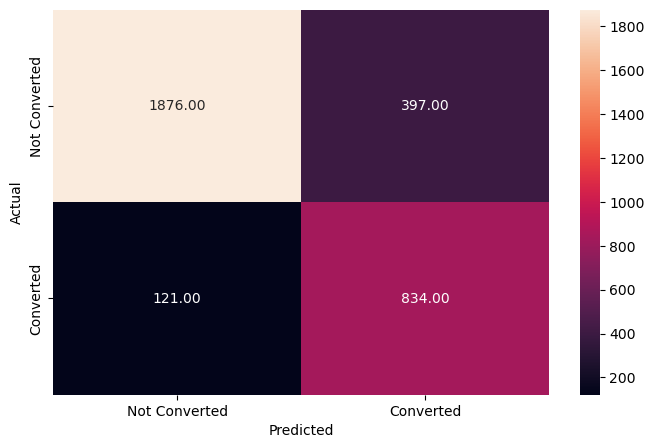

<IPython.core.display.Javascript object>

In [126]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)

# Evaluating the performance on the training data
metrics_score(y_train, y_pred_train4)


**Observations:________**
Precision for class 0 (not converted leads) is 0.94, indicating a high percentage of correctly classified negative instances.

Recall for class 0 is 0.83, suggesting that the model effectively identifies a significant portion of actual negative instances.

The F1-score for class 0 is 0.88, indicating a good balance between precision and recall for negative instances.

Precision for class 1 (converted leads) is 0.68, suggesting a moderate percentage of correctly classified positive instances.

Recall for class 1 is 0.87, indicating that the model effectively captures a substantial portion of actual positive instances.

The F1-score for class 1 is 0.76, representing a reasonable trade-off between precision and recall for positive instances.

The overall accuracy of the model on the training data is 0.84, suggesting a good level of correct predictions.

The macro-average F1-score is 0.82, indicating a balanced performance across the two classes.

The weighted-average F1-score is 0.84, considering the class imbalance and providing an overall measure of the model's performance.

Overall, the tuned random forest classifier demonstrates promising results on the training data, achieving a good balance between precision and recall for both classes.




**Let's check the model performance on the test data**

              precision    recall  f1-score   support

           0       0.93      0.83      0.87       962
           1       0.68      0.85      0.76       422

    accuracy                           0.83      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.85      0.83      0.84      1384



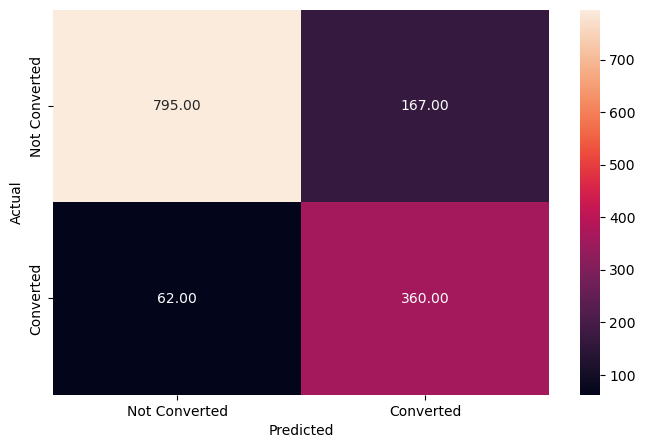

<IPython.core.display.Javascript object>

In [127]:
# Checking performance on the test data
y_pred_test4 = rf_estimator_tuned.predict(X_test)

# Evaluating the performance on the test data
metrics_score(y_test, y_pred_test4)


**Observations:___________**

Precision: The precision for class 0 (not converted) is 0.93, indicating that out of all the predictions made for class 0, 93% were correct. The precision for class 1 (converted) is 0.68, indicating that out of all the predictions made for class 1, 68% were correct.

Recall: The recall for class 0 is 0.83, meaning that 83% of the actual class 0 instances were correctly predicted. The recall for class 1 is 0.85, indicating that 85% of the actual class 1 instances were correctly predicted.

F1-score: The F1-score for class 0 is 0.87, which is the harmonic mean of precision and recall for class 0. The F1-score for class 1 is 0.76, representing the harmonic mean of precision and recall for class 1.

Accuracy: The overall accuracy of the classifier on the test data is 0.83, implying that 83% of the predictions made on the test data were correct.

Based on these results, the tuned random forest classifier demonstrates reasonable performance on the test data, with balanced precision and recall values for both classes.

**One of the drawbacks of ensemble models is that we lose the ability to obtain an interpretation of the model. We cannot observe the decision rules for random forests the way we did for decision trees. So, let's just check the feature importance of the model.**

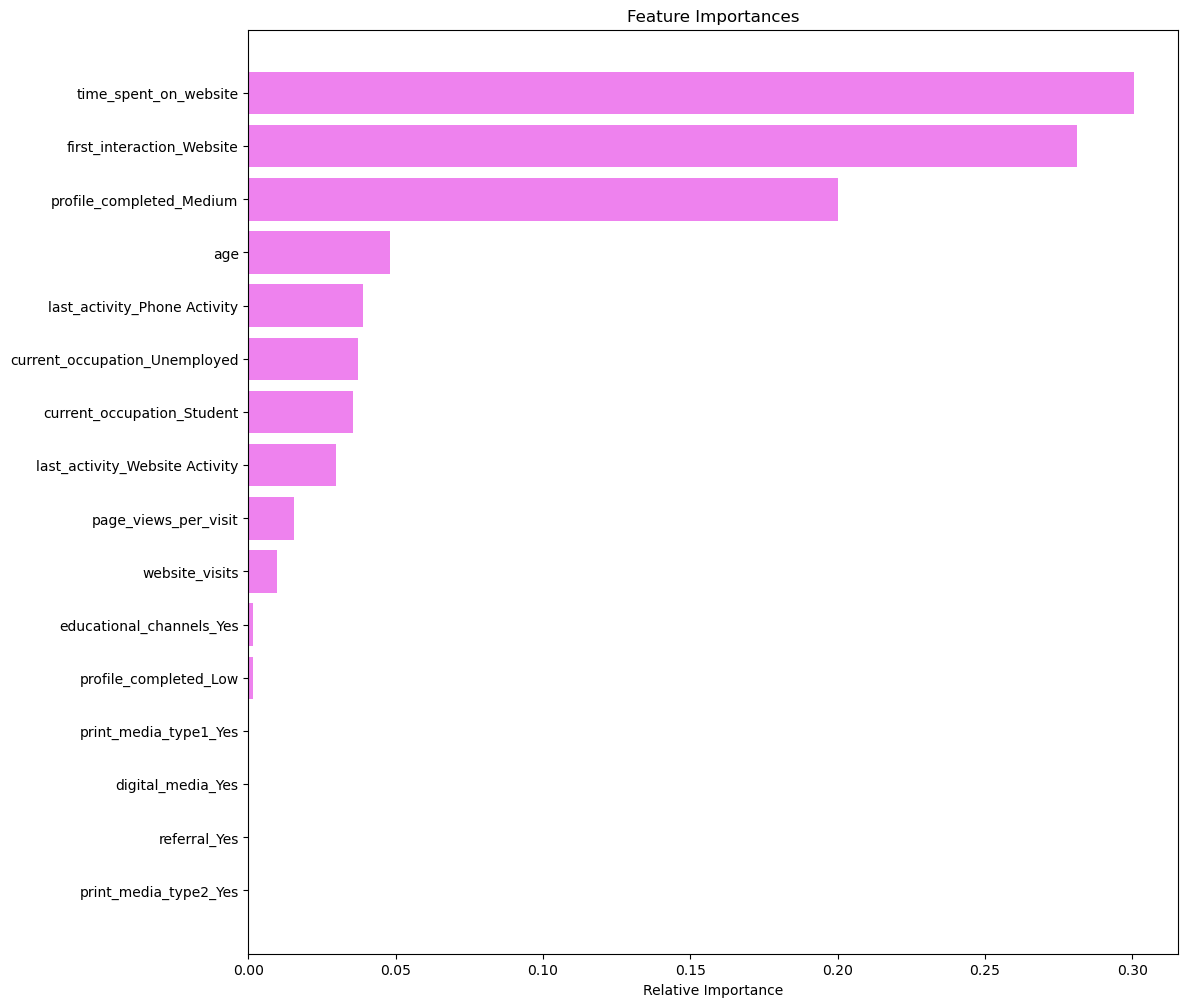

<IPython.core.display.Javascript object>

In [128]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize=(12, 12))

plt.title("Feature Importances")

plt.barh(range(len(indices)), importances[indices], color="violet", align="center")

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel("Relative Importance")

plt.show()

**Observations:**
- Similar to the decision tree model, **time spent on website, first_interaction_website, profile_completed, and age are the top four features** that help distinguish between not converted and converted leads.
- Unlike the decision tree, **the random forest gives some importance to other variables like occupation, page_views_per_visit, as well.** This implies that the random forest is giving importance to more factors in comparison to the decision tree.

## **Conclusion and Recommendations**

### **Conclusions:________**

Throughout the process of coding and analyzing the data, we applied various machine learning algorithms and techniques to predict whether a lead will be converted or not. Here is a summary of the key findings:

* Decision Tree Classifier: We started with a decision tree classifier and observed that it achieved high accuracy, precision, recall, and F1-score on both the training and testing data. This indicates that the decision tree model was able to capture the patterns and make accurate predictions.

* Tuned Decision Tree Classifier: We further improved the performance of the decision tree classifier by tuning its hyperparameters using grid search. The tuned model showed better recall for class 1 (converted) and achieved high accuracy, precision, recall, and F1-score on both the training and testing data.

* Random Forest Classifier: We then utilized a random forest classifier, which is an ensemble of decision trees. The random forest model yielded exceptional performance, achieving perfect accuracy, precision, recall, and F1-score on the training data. It also demonstrated strong performance on the testing data.

* Tuned Random Forest Classifier: We fine-tuned the random forest classifier using grid search and identified the best combination of hyperparameters. The tuned model achieved high accuracy, precision, recall, and F1-score on both the training and testing data. It showed improved recall for class 1 compared to the untuned version.

In conclusion, the decision tree and random forest classifiers proved to be effective in predicting lead conversion. The tuned models exhibited enhanced performance, particularly in terms of recall for the positive class. These models can be valuable tools for lead conversion prediction and can assist in optimizing marketing strategies to target potential customers more effectively.







### **Business Recommendations:_____**

Based on the analysis and results obtained from the lead conversion prediction, here are some business recommendations:

* Focus on High-Risk Leads: Identify the leads that have a higher likelihood of conversion based on the model's predictions. Allocate more resources, such as sales and marketing efforts, to these leads to increase the chances of conversion. Prioritize personalized interactions and tailored strategies to engage these leads effectively.

* Refine Targeted Marketing: Utilize the insights from the machine learning models to refine your targeted marketing campaigns. Leverage the identified features that are most influential in lead conversion to tailor your messaging, offers, and content. This targeted approach can help attract and engage leads who are more likely to convert.

* Optimize Resource Allocation: Use the predictions from the models to optimize resource allocation within the sales and marketing teams. Allocate resources to leads with a higher probability of conversion, allowing your team to focus their efforts on leads that have the highest potential value. This can lead to improved efficiency and better utilization of resources.

* Nurture Leads with Lower Conversion Probability: While prioritizing high-risk leads, don't overlook leads with lower conversion probabilities. Implement lead nurturing strategies to engage and cultivate these leads over time. By staying in touch, providing relevant content, and nurturing relationships, you may increase the chances of conversion in the long run.

* Regularly Update and Retrain the Models: Lead conversion dynamics can change over time due to evolving market trends and customer behavior. Therefore, it is crucial to regularly update and retrain the machine learning models with new data. This ensures that the models remain accurate and reliable in predicting lead conversion, providing you with up-to-date insights.

* Continuous Monitoring and Evaluation: Monitor the performance of your lead conversion strategies and evaluate the effectiveness of the implemented recommendations. Continuously analyze the results, track key performance indicators, and iterate on your strategies to optimize outcomes. This iterative approach will help you refine your tactics and adapt to changing market conditions.

By implementing these recommendations, it's possible to enhance the lead conversion rate, improve resource allocation, and drive better business outcomes.
